# IBM HR Analytics Employee Attrition & Performance

퇴사에 영향을 끼치는 요인 분석 및 직원의 퇴사 가능성을 예측

##### package

In [82]:
# package import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from matplotlib import cm
from matplotlib import font_manager,rc 
rc('font', family='AppleGothic')      # 한글 글꼴
import warnings
warnings.filterwarnings('ignore')

* Data Info

In [83]:
df = pd.read_csv('Attrition.csv')

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [84]:
df.describe()

# EmployeeCount, StandardHours : 수치가 한 개
# EmployeeNumber : 최소최대 1 ~ 2068 -> 사원 번호

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

---

* 결측치 확인

In [86]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

---

---

#### 필요없는 변수 제거

* Over18, EmployeeCount,EmployeeNumber,StandardHours
* Over18, StandardHours, EmployeeCount는 자료값이 1개라 제외
* EmployeeNumber는 직원 번호라 제외

In [87]:
df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)
df_copy = df.copy()
print('필요 없는 변수 제거 후 전체 변수의 수 :',len(df.columns))

필요 없는 변수 제거 후 전체 변수의 수 : 31


In [88]:
# int 변수 -> object 변수

df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'},inplace=True)
df['EnvironmentSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['JobInvolvement'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['JobSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['PerformanceRating'].replace({1:'Low',2:'Good',3:'Excellent',4:'Outstanding'},inplace=True)
df['RelationshipSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['WorkLifeBalance'].replace({1:'Bad',2:'Good',3:'Better',4:'Best'},inplace=True)

df['JobLevel'] = df['JobLevel'].astype('object')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('object')
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype('object')
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].astype('object')

---

#### Object 형식 변수

In [89]:
# object 변수

object_col = []
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
print(object_col)
print('Object 형식 변수 :',len(object_col))

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
Object 형식 변수 : 19


#### Int 형식 변수

In [90]:
# int 변수

int_col = []
for i in df.columns:
    if df[i].dtype!='object':
        int_col.append(i)
print(int_col)
print('Int 형식 변수 :',len(int_col))

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Int 형식 변수 : 12


---
### 가설  

* 출장 빈도에 따른 퇴사율 차이가 날것이다.   
* 부서,업무종류에 따라 퇴사율 차이가 날것이다.
* 업무환경, 업무만족도에 따라 퇴사율 차이가 날것이다.  
* 워라밸에 따라 퇴사율 차이가 날것이다.  
* 결혼 여부에 따른 퇴사율 차이가 날것이다.  

---

#### 퇴사 직원 비율 확인

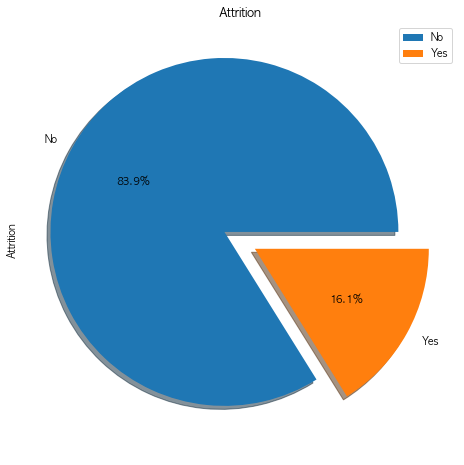

In [91]:
plt.figure(figsize=(15,8))
df['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',title='Attrition',legend=True,shadow=True)
plt.show()

#### Object 형식 변수에 따라 퇴사 여부 그래프

In [92]:
# 컬럼별 정렬이 안된 그래프

def att_ratio_all(col):
    
    att_yes = df[df['Attrition']=='Yes'].groupby(df[col]).size() / df['Attrition'].groupby(df[col]).size()
    att_no = df[df['Attrition']=='No'].groupby(df[col]).size() / df['Attrition'].groupby(df[col]).size()
    
    att = pd.merge(pd.DataFrame(att_yes),pd.DataFrame(att_no),on=col)
    
    att.rename(columns={'0_x':'Yes','0_y':'No'},inplace=True)
    att = att.reindex(index=att.index)
    
    att.plot(kind='bar')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    
    for i, v in enumerate(att.index):
        plt.text(i-0.14,att['Yes'][i],str(round(att['Yes'][i]*100,1))+'%',
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
        
    for i, v in enumerate(att.index):
        plt.text(i+0.14,att['No'][i],str(round(att['No'][i]*100,1))+'%',
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')

    plt.show()

In [93]:
def att_ratio(col,arg):
    
    att_yes = df[df['Attrition']=='Yes'].groupby(df[col]).size() / df['Attrition'].groupby(df[col]).size()
    att_no = df[df['Attrition']=='No'].groupby(df[col]).size() / df['Attrition'].groupby(df[col]).size()
    
    att = pd.merge(pd.DataFrame(att_yes),pd.DataFrame(att_no),on=col)
    
    att.rename(columns={'0_x':'Yes','0_y':'No'},inplace=True)
    att = att.reindex(index=arg)
    
    att.plot(kind='bar')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    
    for i, v in enumerate(att.index):
        plt.text(i-0.14,att['Yes'][i],str(round(att['Yes'][i]*100,1))+'%',
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
        
    for i, v in enumerate(att.index):
        plt.text(i+0.14,att['No'][i],str(round(att['No'][i]*100,1))+'%',
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')

    plt.show()

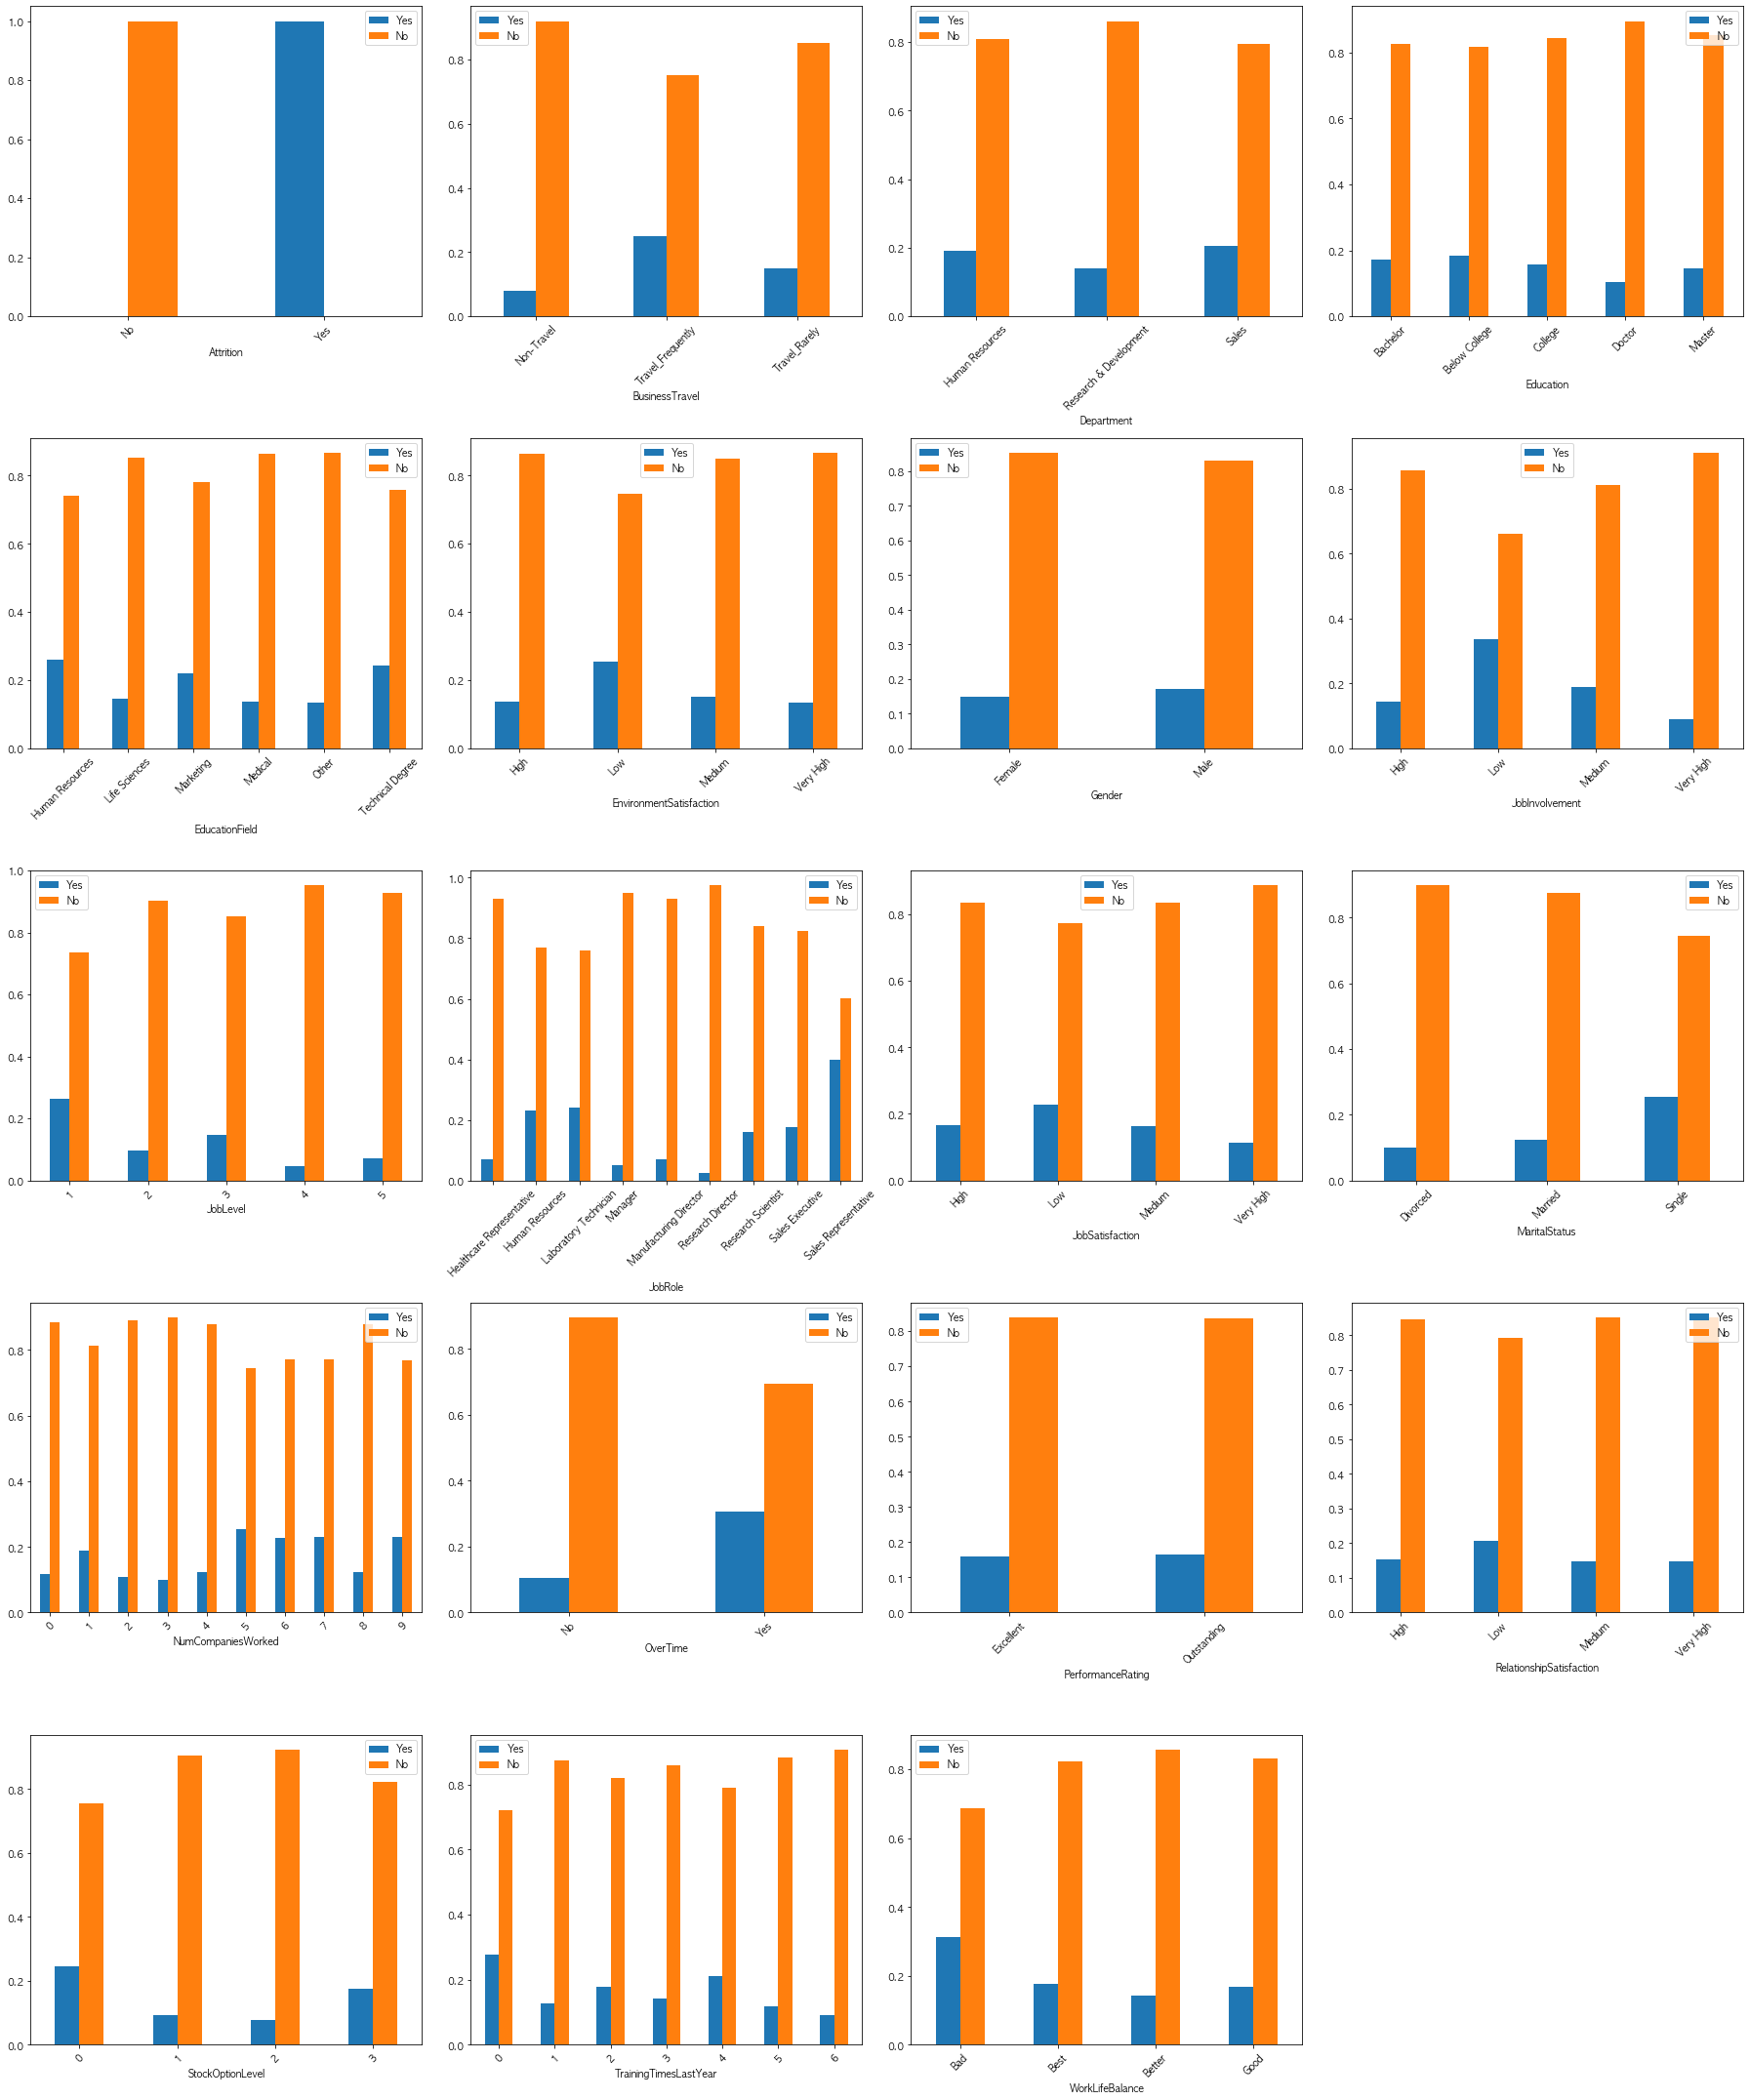

In [94]:
# 카테고리 변수 - 퇴사 여부 비율 그래프 전체

fig, ax = plt.subplots(4, 5, figsize=(25,30))

l = 1
for i in range(len(object_col)):
    
    att_yes = df[df['Attrition']=='Yes'].groupby(object_col[i]).size() / df['Attrition'].groupby(df[object_col[i]]).size()
    att_no = df[df['Attrition']=='No'].groupby(object_col[i]).size() / df['Attrition'].groupby(df[object_col[i]]).size()
    
    att = pd.merge(pd.DataFrame(att_yes),pd.DataFrame(att_no),on=object_col[i])
    att.rename(columns={'0_x':'Yes','0_y':'No'},inplace=True)
    ax = plt.subplot(5,4,l)
    att.plot(kind='bar',ax=ax)
    plt.xticks(rotation=45)
    plt.tight_layout()
    if l > 19:
        break
    l += 1

* 일한 회사의 수가 0개?

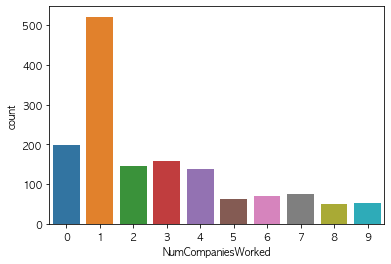

In [95]:
sns.countplot(df['NumCompaniesWorked'],data=df)
plt.show()

* 일한 회사의 수가 0개 이면서 경력기간과 근속연수가 같은 직원의 수 : 0명

In [96]:
#일한 회사가 0개인데 경력기간과 근속연수가 같은 사람은 없다 -> 0개가 첫회사면 경력기간과 근속연수가 같아야한다.
print(len(df[(df['NumCompaniesWorked']==0) & (df['TotalWorkingYears'] == df['YearsAtCompany'])]))

0


* 0개가 첫회사면 일한회사가 1개인 사람들은 경력기간과 근속연수가 같으면 안된다.
* (일한 회사가 1개이면 2개이기 때문에)

In [97]:
# 일한 회사가 1개인데 경력기간과 근속연수가 같은 사람은 474명 -> 0개가 첫회사라면 이사람들은 회사가 2개니까 경력기간과 근속연수가 같으면 안된다.
print(len(df[(df['NumCompaniesWorked']==1) & (df['TotalWorkingYears'] == df['YearsAtCompany'])]))

474


* 일한 회사의 수가 1개이면서 경력기간과 근속연수가 다른 직원의 수 :47명  
* 근속연수가 1년이 되지 않았지만 햇수로 입사한 지 1년이 넘은 직원으로 예상

In [98]:
# 일한 회사가 1개면서 경력기간과 근속연수가 다른 사람은 47명 -> 근속연수가 1년이 되지 않았지만 햇수로 입사한지 1년이 넘은 사람들로 예상
len(df[(df['NumCompaniesWorked']==1) & (df['TotalWorkingYears'] != df['YearsAtCompany'])])

47

* 경력기간과 근속연수가 같은 사람의 일한 회사 수는 1개 -> 첫 회사가 IBM

In [99]:
# 경력기간과 근속연수가 같은 사람의 일한 회사 수는 1개 -> 첫 회사가 IBM
df[df['TotalWorkingYears'] == df['YearsAtCompany']]['NumCompaniesWorked'].head()

1     1
3     1
7     1
12    1
15    1
Name: NumCompaniesWorked, dtype: object

* 경력기간과 근속연수가 같은 사람의 일한 회사의 수는 1개
* 일한 회사가 0개인 직원은 오류라고 생각하여 일한 회사가 0개인 사람들을 1로 올려서 오류 제거

In [100]:
# 일한 회사가 0개인 직원들의 오류 제거

df['NumCompaniesWorked'].replace(0,1,inplace=True)

---

#### Int 형식 변수에 퇴사 퇴직 여부

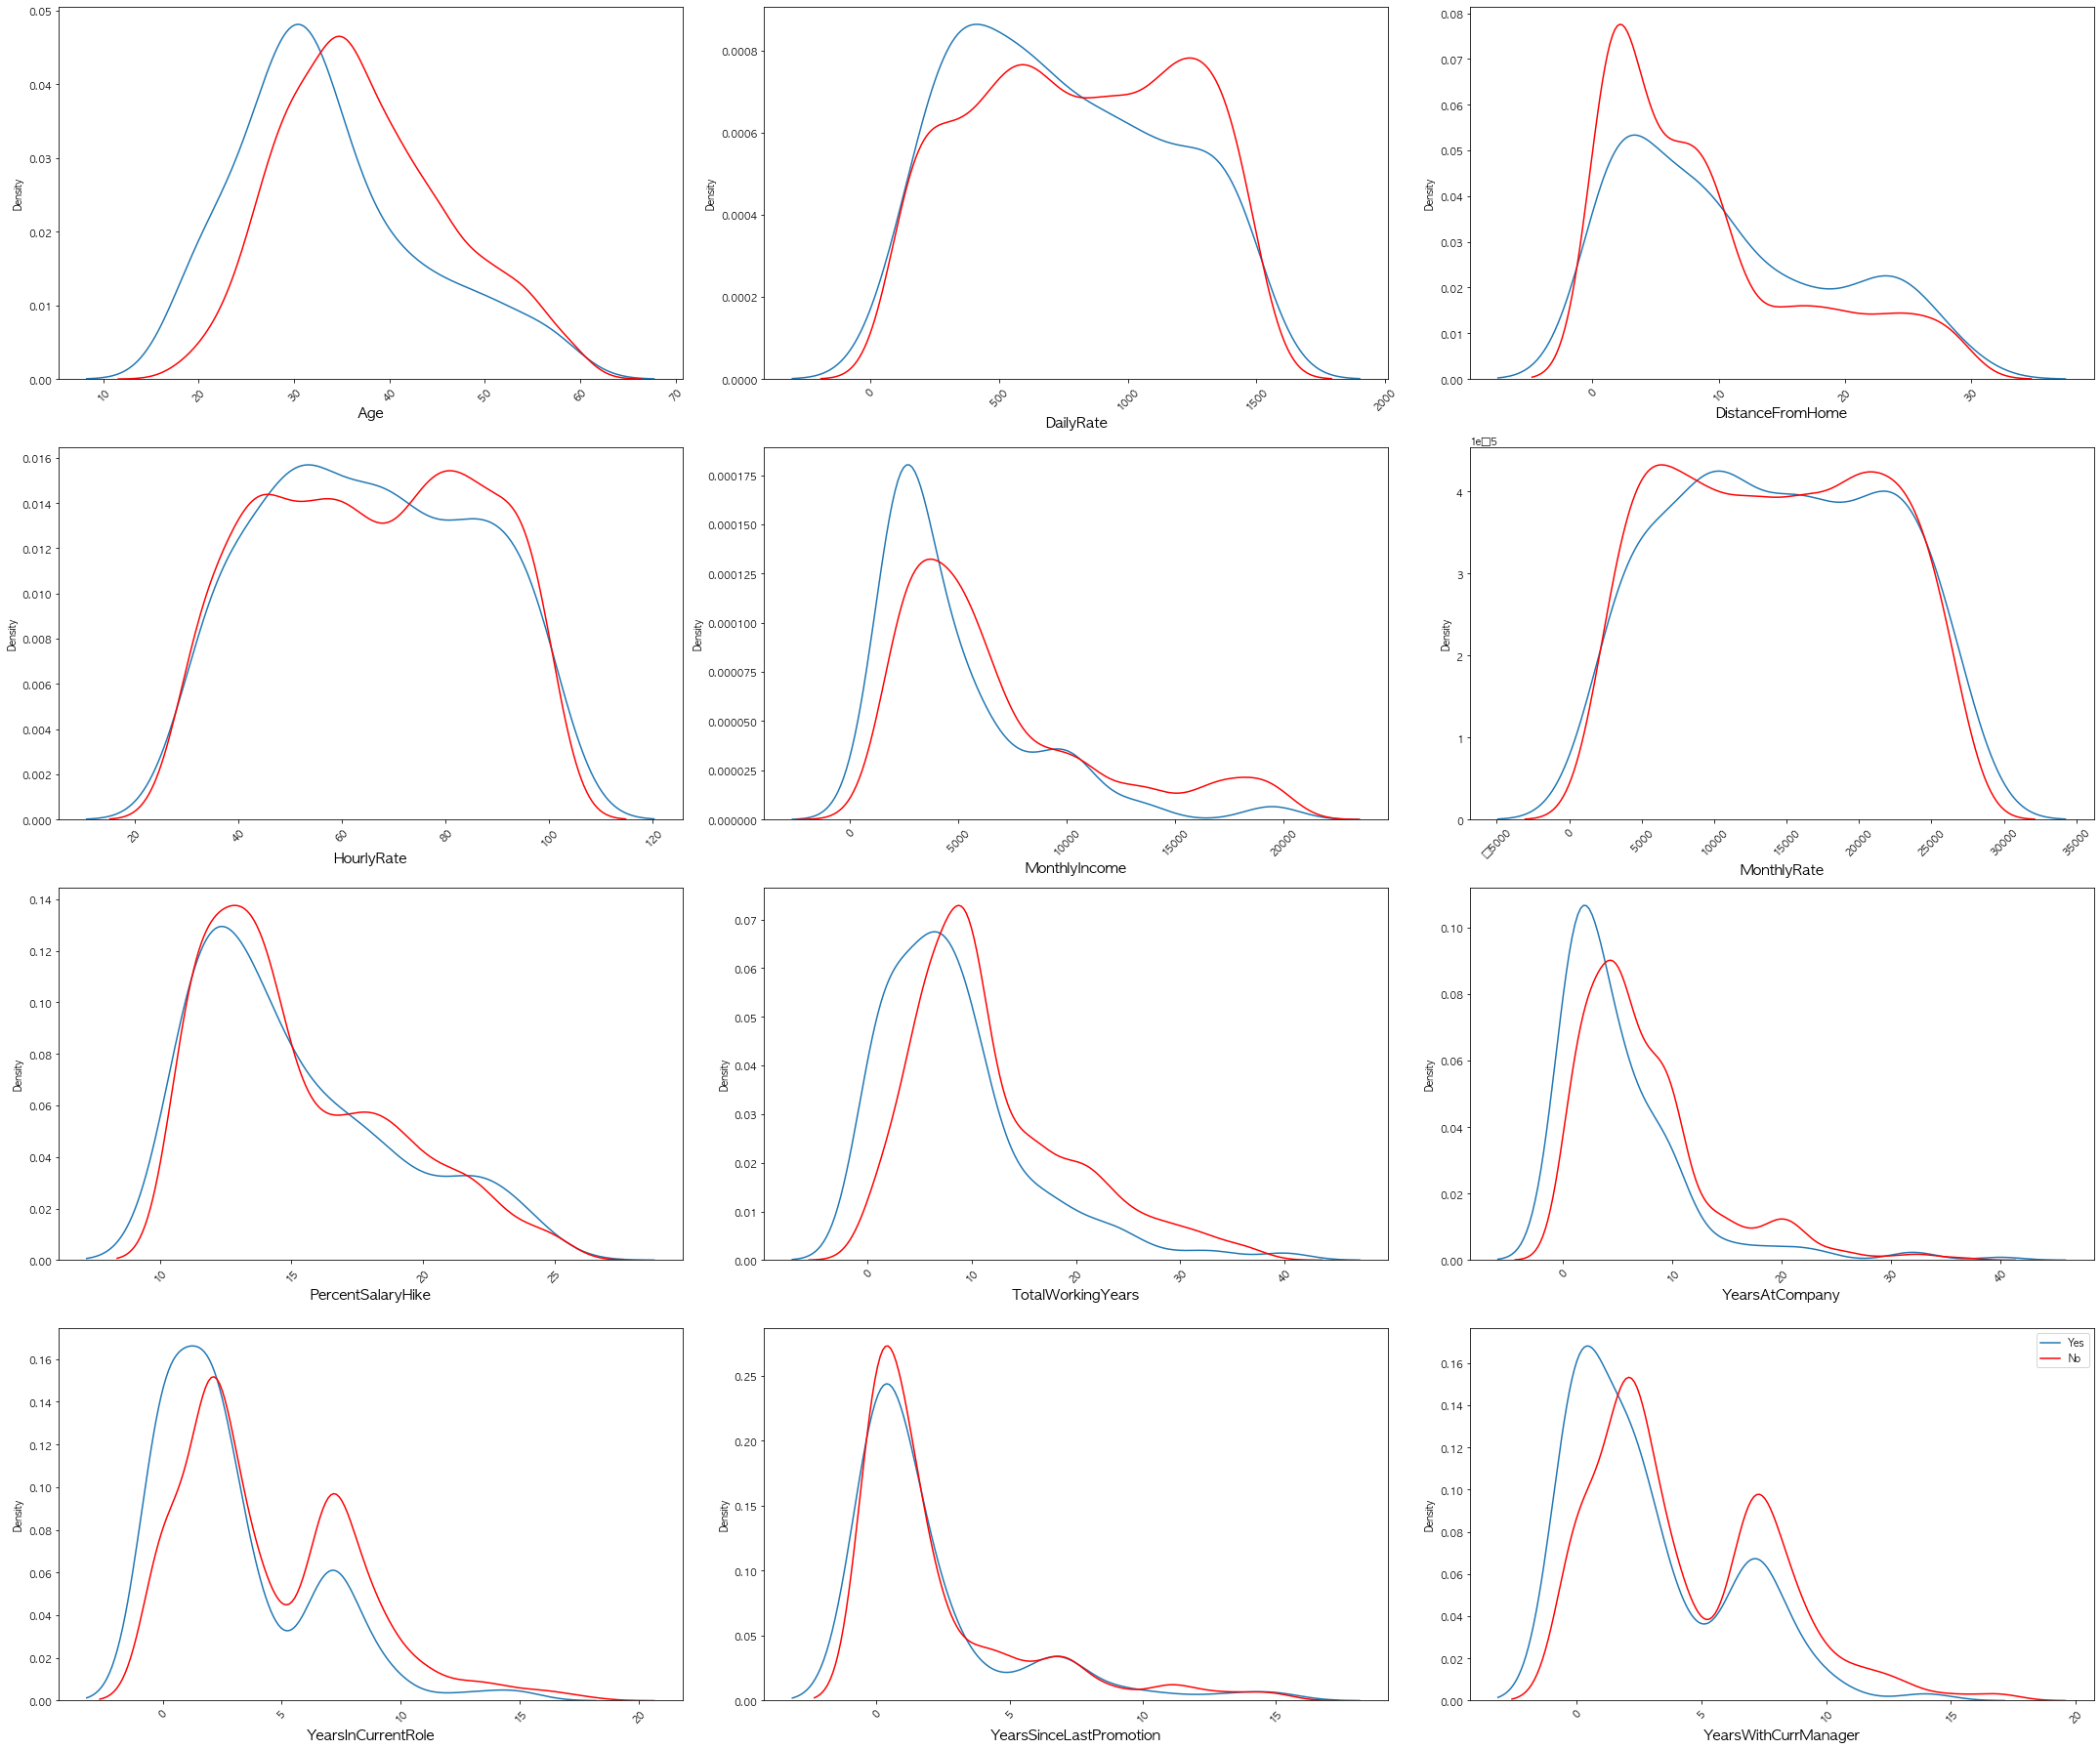

In [101]:
# int 변수 - 퇴사 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,3,l)
    sns.distplot(df[df['Attrition']=='Yes'][int_col[i]],kde=True,hist=False,hist_kws=({'alpha':1}),label='Yes')
    sns.distplot(df[df['Attrition']=='No'][int_col[i]],kde=True,hist=False,kde_kws=({'color':'red'}),label='No')
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 12:
        break
    l += 1
fig.tight_layout()
plt.legend()
plt.show()

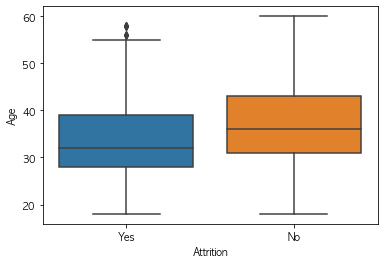

In [102]:
sns.boxplot(df['Attrition'],df['Age'])
plt.show()

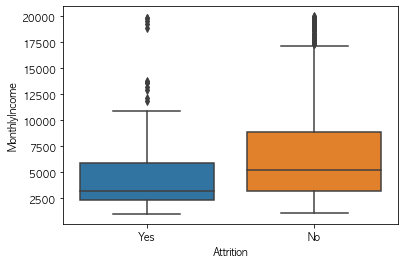

In [103]:
sns.boxplot(df['Attrition'],df['MonthlyIncome'])
plt.show()

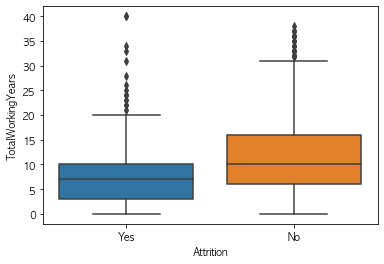

In [104]:
sns.boxplot(df['Attrition'],df['TotalWorkingYears'])
plt.show()

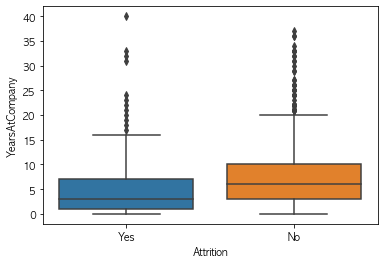

In [105]:
sns.boxplot(df['Attrition'],df['YearsAtCompany'])
plt.show()

---

#### 퇴사 여부 비율 그래프

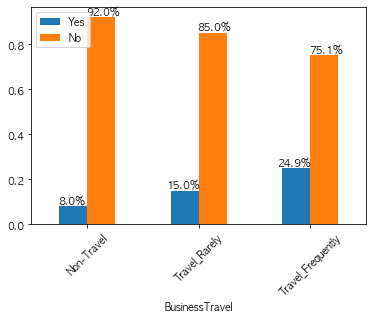

In [106]:
# 카테고리 변수 - 퇴사 여부 비율 그래프

# 출장 빈도에 따른 퇴사율 그래프
att_ratio('BusinessTravel',['Non-Travel','Travel_Rarely','Travel_Frequently'])

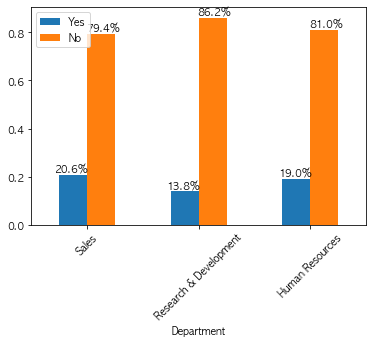

In [107]:
# 부서별 퇴사율 그래프
att_ratio('Department',['Sales', 'Research & Development', 'Human Resources'])

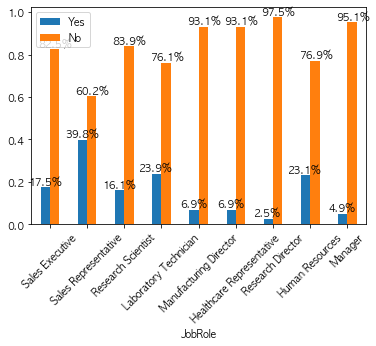

In [108]:
# 직무별 퇴사율 그래프
att_ratio('JobRole',['Sales Executive','Sales Representative','Research Scientist','Laboratory Technician','Manufacturing Director',
                     'Healthcare Representative','Research Director','Human Resources','Manager'])

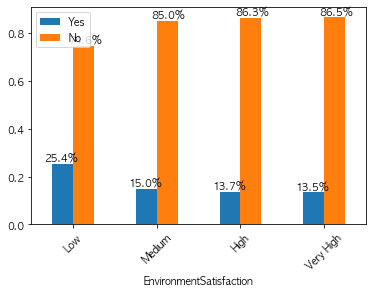

In [109]:
# 업무환경 만족도별 퇴사율 그래프

att_ratio('EnvironmentSatisfaction',['Low','Medium','High','Very High'])

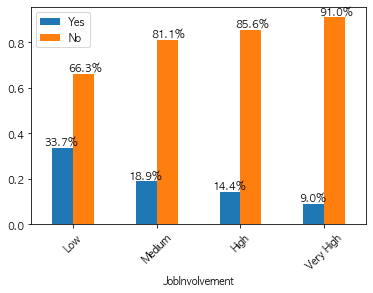

In [110]:
# 업무참여도별 퇴사율 그래프

att_ratio('JobInvolvement',['Low','Medium','High','Very High'])

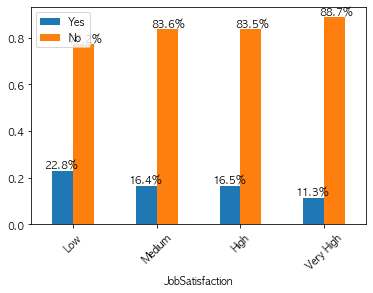

In [111]:
# 업무만족도별 퇴사율 그래프

att_ratio('JobSatisfaction',['Low','Medium','High','Very High'])

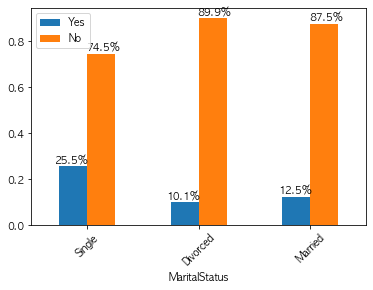

In [112]:
# 결혼 여부별 퇴사율 그래프

att_ratio('MaritalStatus',['Single','Divorced','Married'])

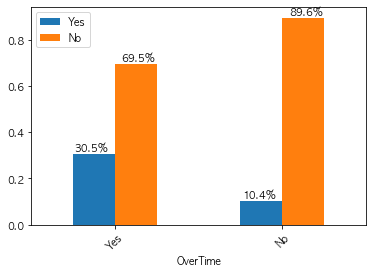

In [113]:
# 야근 유무별 퇴사율 그래프

att_ratio('OverTime',['Yes','No'])

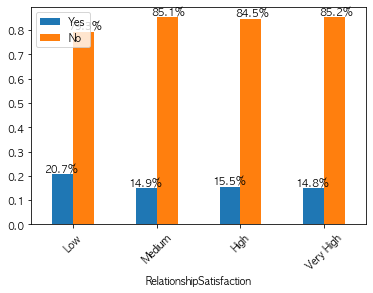

In [114]:
# 대인관계 만족도별 퇴사율 그래프 

att_ratio('RelationshipSatisfaction',['Low','Medium','High','Very High'])

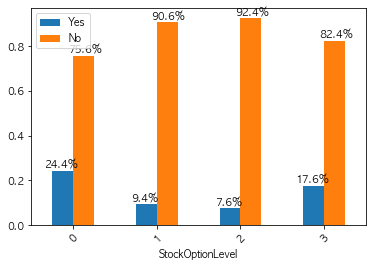

In [115]:
# 스톡옵션 정도에 따른 퇴사율 그래프
# 스톡옵션을 많이 받는 사람들 = 임원?
att_ratio('StockOptionLevel',[0,1,2,3])

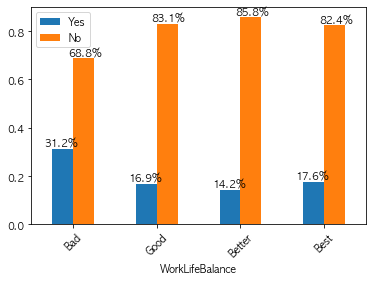

In [116]:
# 워라밸에 따른 퇴사율 그래프

att_ratio('WorkLifeBalance',['Bad','Good','Better','Best'])

---

#### 가설 확인

퇴사 비율 그래프

In [117]:
def ratio_graph(col,arg):
    fig, ax = plt.subplots(1, 2, figsize=(15,8))
    
    att_yes = df[df['Attrition']=='Yes'].groupby(df[col]).size() / df['Attrition'].groupby(df[col]).size()
    att_no = df[df['Attrition']=='No'].groupby(df[col]).size() / df['Attrition'].groupby(df[col]).size()
    
    att = pd.merge(pd.DataFrame(att_yes),pd.DataFrame(att_no),on=col)
    
    att.rename(columns={'0_x':'Yes','0_y':'No'},inplace=True)
    att = att.reindex(index=arg)
    
    ax1 = plt.subplot(1,2,1)
    att.plot(kind='bar',ax=ax1)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.title('전체 사원 중 퇴사 비율')
    
    for i, v in enumerate(att.index):
        plt.text(i-0.14,att['Yes'][i],str(round(att['Yes'][i]*100,1))+'%',
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
        
    for i, v in enumerate(att.index):
        plt.text(i+0.14,att['No'][i],str(round(att['No'][i]*100,1))+'%',
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')  
        
    x = df[df['Attrition']=='Yes'].groupby(df[col]).size() / len(df[df['Attrition']=='Yes'])
    x = x.reindex(index=arg)
    colors = sns.color_palette('Blues',len(df[col].unique()))
    
    ax2 = plt.subplot(1,2,2)
    x.plot(kind='bar',ax=ax2,color=colors)
    plt.title('퇴사자 중 {}별 비율'.format(col))
    plt.xticks(rotation=45)
    # plt.bar(x.index,x.values,color=colors,ax=ax2)
    
    for i, v in enumerate(x.index):
        plt.text(i,x.values[i],round(x.values[i]*100,1),
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
    plt.show()

  
  
#### 출장 빈도에 따른 퇴사율이 차이가 날것이다.

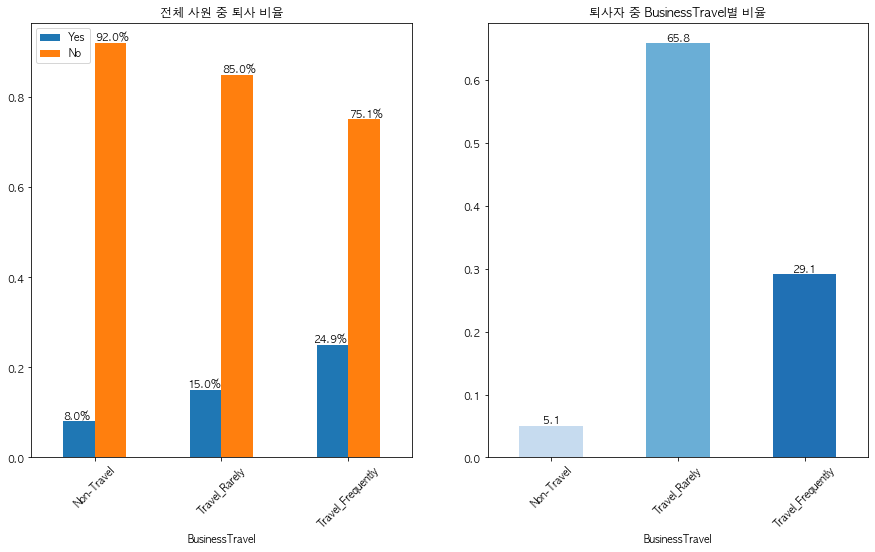

In [118]:
# 출장 빈도별 퇴사율 비교 그래프

ratio_graph('BusinessTravel',['Non-Travel','Travel_Rarely','Travel_Frequently'])

* 출장을 자주 가는 사람의 퇴사비율이 높다. 

#### 부서에 따라 퇴사율 차이가 날것이다.

<Figure size 1440x576 with 0 Axes>

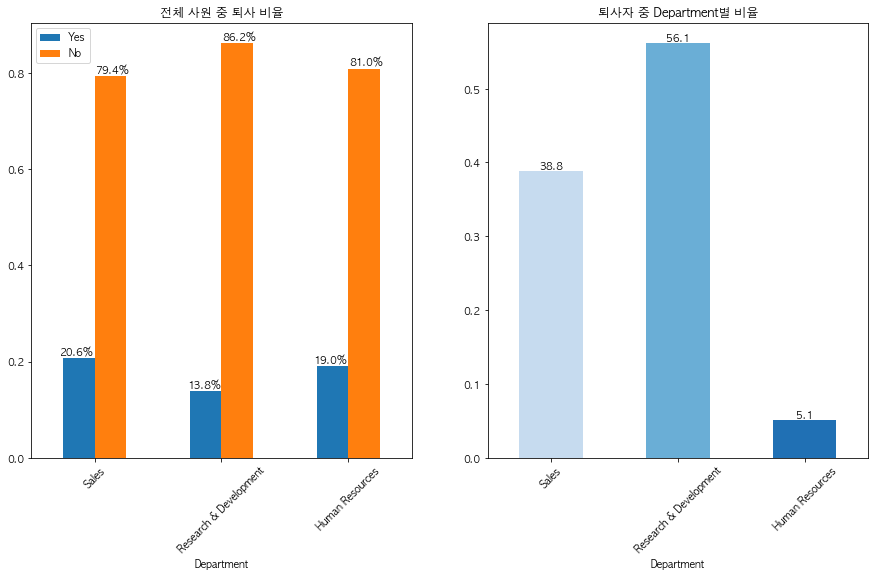

In [119]:
plt.figure(figsize=(20,8))
ratio_graph('Department',['Sales', 'Research & Development', 'Human Resources'])

#### 업무종류별 퇴사율 비교 그래프

<Figure size 1440x576 with 0 Axes>

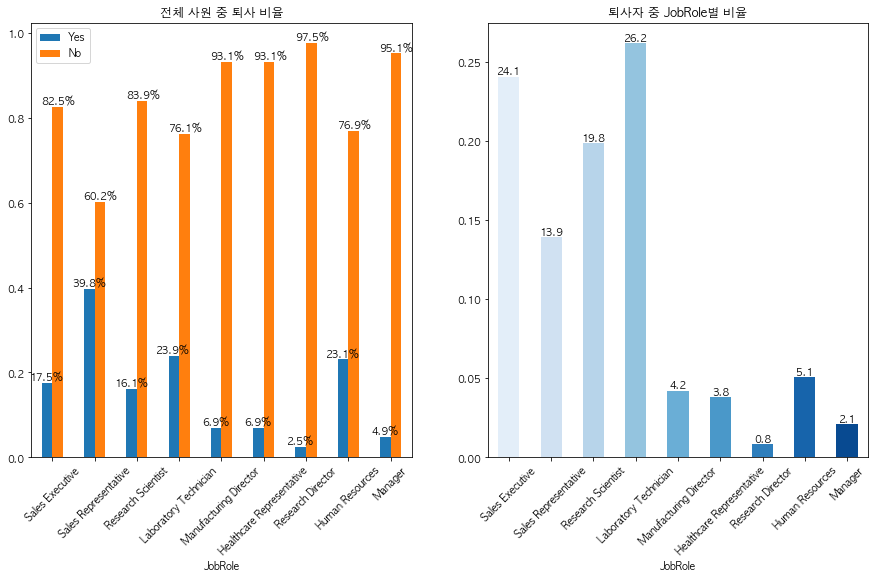

In [120]:
plt.figure(figsize=(20,8))
ratio_graph('JobRole',['Sales Executive','Sales Representative', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Research Director', 'Human Resources' ,'Manager'])

#### 업무환경만족도가 낮으면 퇴사가 많다.

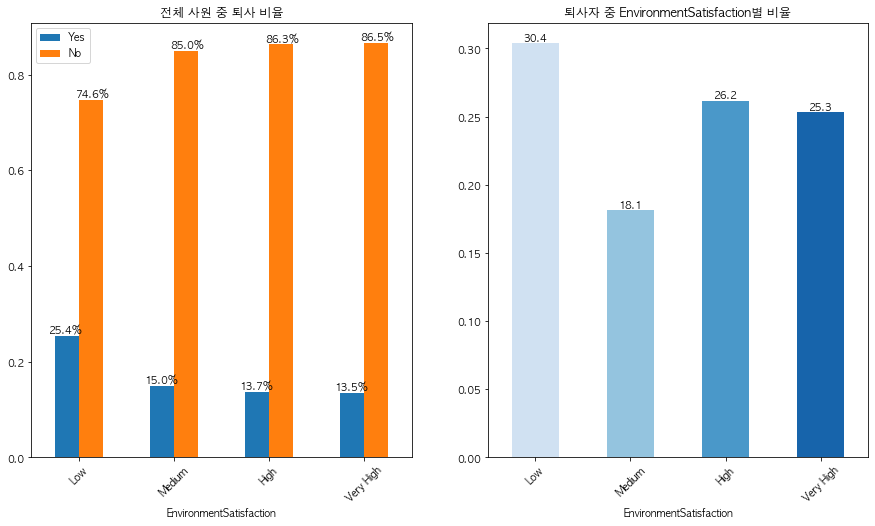

In [121]:
#업무환경만족도별 퇴사율 비교 그래프

ratio_graph('EnvironmentSatisfaction',['Low','Medium','High','Very High'])

#### 업무만족도가 낮으면 퇴사가 많다.

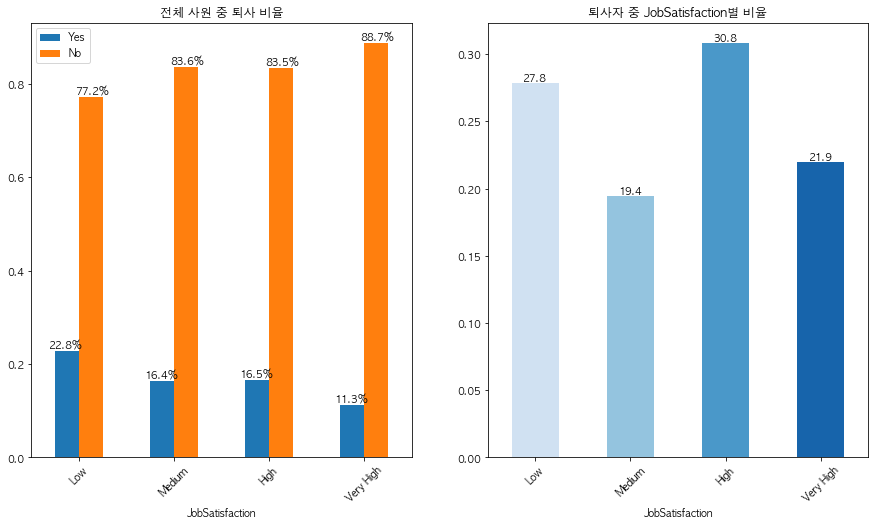

In [122]:
#업무만족도별 퇴사율 비교 그래프.

ratio_graph('JobSatisfaction',['Low','Medium','High','Very High'])

#### 워라밸이 낮으면 퇴사가 많을것이다.

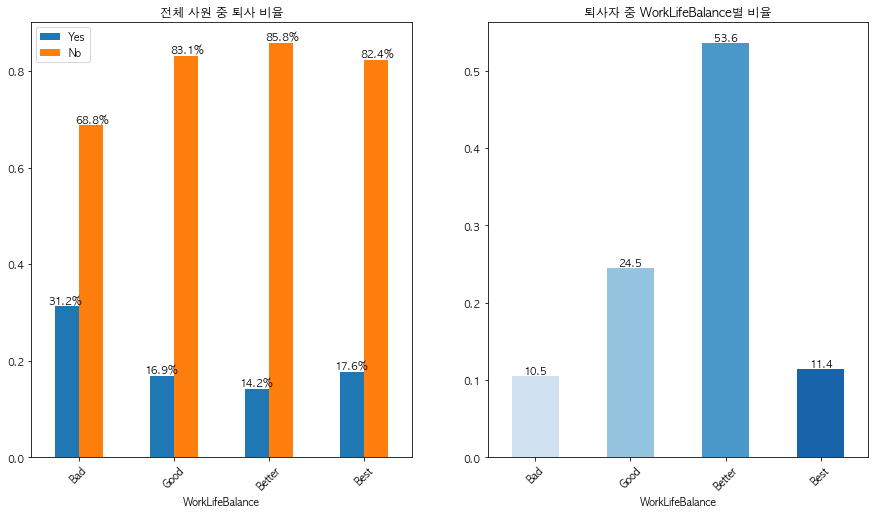

In [123]:
#워라밸별 퇴사율 비교 그래프.  

ratio_graph('WorkLifeBalance',['Bad','Good','Better','Best'])

#### 결혼 여부에 따른 퇴사율이 차이가 날것이다.

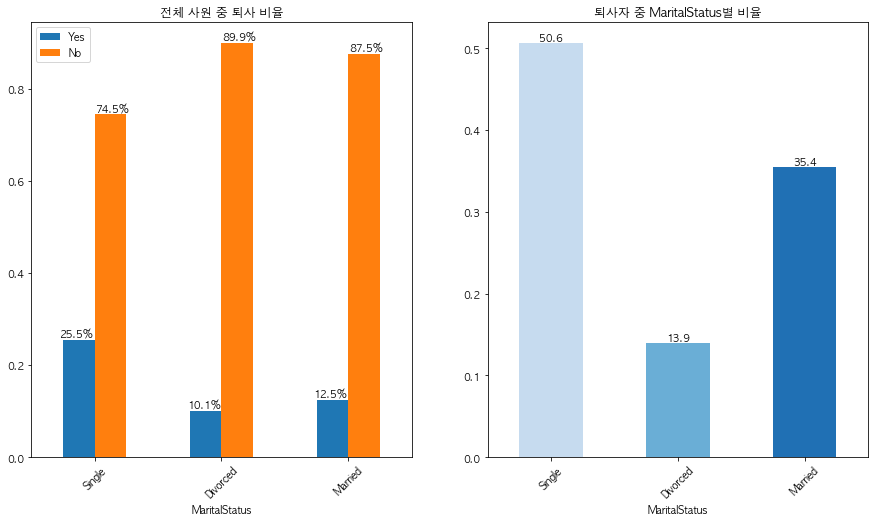

In [124]:
#결혼 여부에 따른 퇴사율 비교 그래프.

ratio_graph('MaritalStatus',['Single','Divorced','Married'])

---

#### 상관관계

In [125]:
df_copy = df.copy()
# df_copy_dum = pd.get_dummies(df_copy,drop_first=True)
# dum_corr = df_copy_dum.corr()

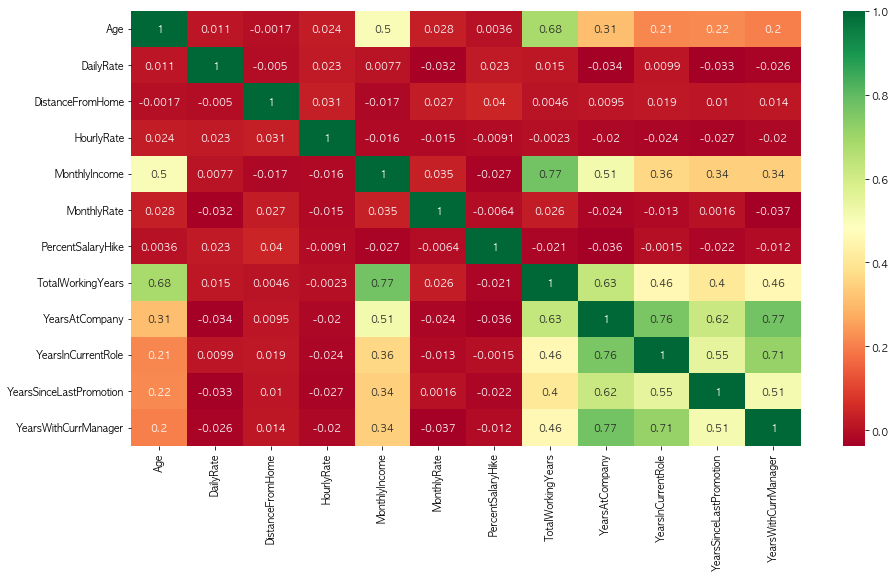

In [126]:
# 연속형 범주들의 상관계수 히트맵

plt.figure(figsize=(15,8))
int_corr = df_copy[int_col].corr()
sns.heatmap(int_corr,cmap='RdYlGn',annot=True)
plt.show()

In [127]:
df_obj_copy = df[object_col].copy()

In [128]:
# spearman 할때는 더미말고 라벨인코더
from sklearn.preprocessing import LabelEncoder

object_le = LabelEncoder()
df_obj_copy_le = df_obj_copy[object_col].apply(object_le.fit_transform)

In [129]:
# 범주형 변수(순위 변수) 리스트

df_obj_copy_le['BusinessTravel'].replace(1,3,inplace=True)
df_obj_copy_le['BusinessTravel'].replace(2,1,inplace=True)
df_obj_copy_le['BusinessTravel'].replace(3,2,inplace=True)
df_obj_copy_le['WorkLifeBalance'].replace(1,4,inplace=True)
df_obj_copy_le['WorkLifeBalance'].replace(2,1,inplace=True)
df_obj_copy_le['WorkLifeBalance'].replace(4,2,inplace=True)

att_le = df_obj_copy_le['Attrition']

df_obj_copy_le.drop(['Attrition'],axis=1,inplace=True)

ord_list = ['BusinessTravel','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
            'PerformanceRating','RelationshipSatisfaction','StockOptionLevel']

In [130]:
# 라벨인코더한 범주형 변수의 상관계수
# 범주형 변수가 순위 척도(만족도 1 ~ 5)이기 때문에 speaman 상관 방법 이용

df_obj_ord_copy_le_corr = df_obj_copy_le[ord_list].corr(method='spearman') # 라벨인코더한 범주형 변수

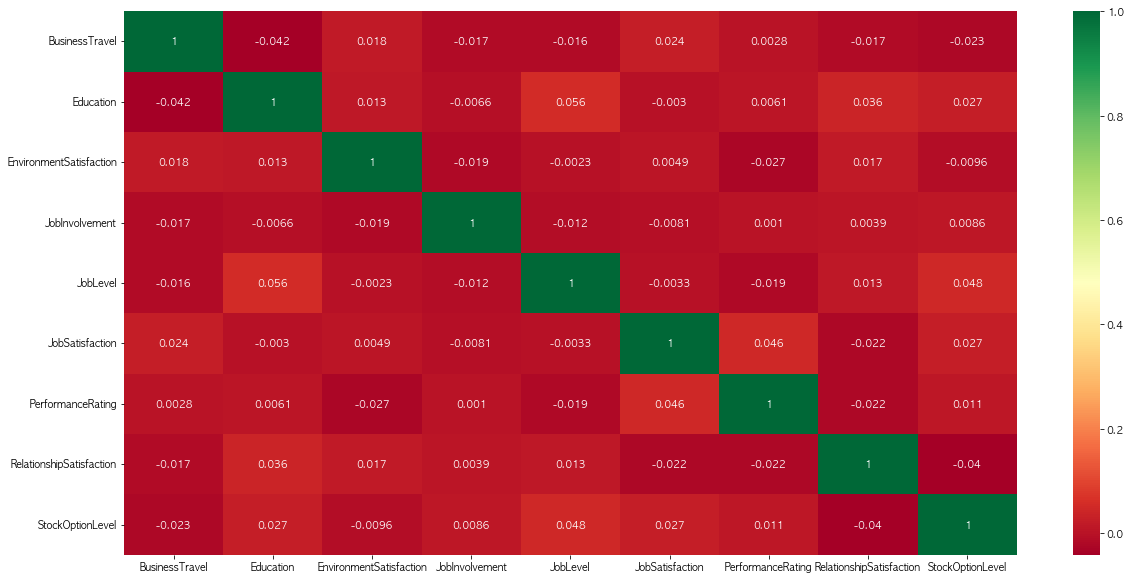

In [131]:
plt.figure(figsize=(20,10))
sns.heatmap(df_obj_ord_copy_le_corr,cmap='RdYlGn',annot=True)
plt.show()

# 순위 척도 변수끼리는 상관관계가 없다

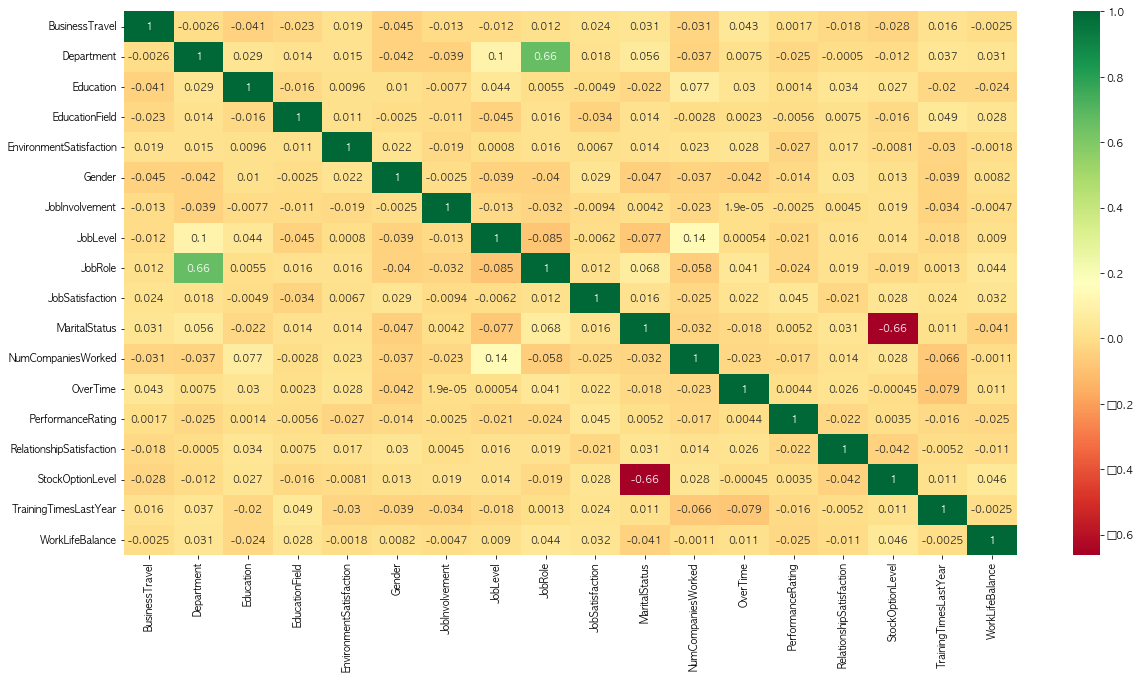

In [132]:
df_obj_copy_le_corr = df_obj_copy_le.corr() # 라벨인코더한 범주형 변수

plt.figure(figsize=(20,10))
sns.heatmap(df_obj_copy_le_corr,cmap='RdYlGn',annot=True)
plt.show()

In [133]:
print('부서별 직무')
print(df.groupby(['Department','JobRole']).size()) # 각 부서에 업무종류에 맞는사람이 잘 들어가있다
print('\n 결혼유무별 스톡옵션레벨')
print(df.groupby(['MaritalStatus','StockOptionLevel']).size()) # Single은 스톡옵션레벨이 0 # ,married = 0, divorced = 1, single = 2
# 결혼이 올라가면 스톡옵션은 떨어진다

부서별 직무
Department              JobRole                  
Human Resources         Human Resources               52
                        Manager                       11
Research & Development  Healthcare Representative    131
                        Laboratory Technician        259
                        Manager                       54
                        Manufacturing Director       145
                        Research Director             80
                        Research Scientist           292
Sales                   Manager                       37
                        Sales Executive              326
                        Sales Representative          83
dtype: int64

 결혼유무별 스톡옵션레벨
MaritalStatus  StockOptionLevel
Divorced       0                     8
               1                   195
               2                    75
               3                    49
Married        0                   153
               1                   401
               2      

---

#### 싱글이면 왜 스톡옵션이 0일까?

##### 나이가 어리면 스톡옵션을 못 받아서?

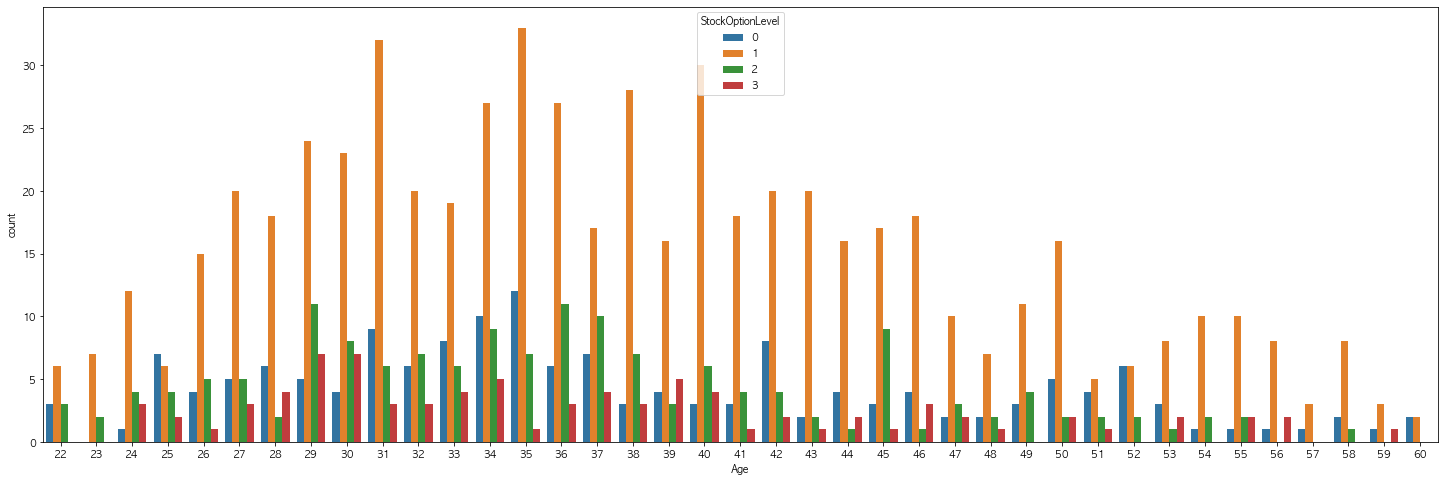

In [134]:
# 싱글이 아닌 사람들의 나이에 따른 스톡옵션

fig = plt.figure(figsize=(25,8))
sns.countplot(df[df['MaritalStatus']!='Single']['Age'],hue='StockOptionLevel',data=df)
plt.show()

* 전체 사원과 싱글인 사원들의 나이 분포 그래프

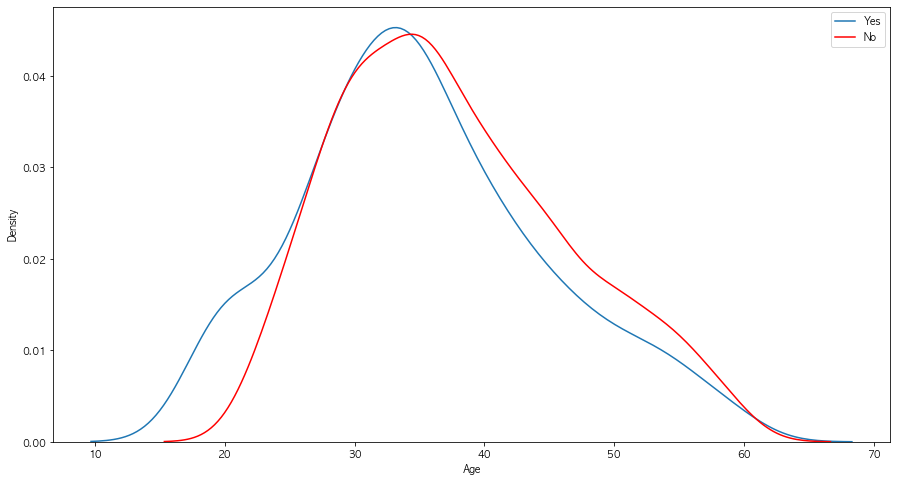

In [135]:
# 싱글인 사원들과 싱글이 아닌 사원들의 나이 분포 그래프

fig = plt.figure(figsize =(15,8))
sns.distplot(df[df['MaritalStatus']=='Single']['Age'],kde=True,hist=False,hist_kws=({'alpha':1}),label='Yes')
sns.distplot(df[df['MaritalStatus']!='Single']['Age'],kde=True,hist=False,kde_kws=({'color':'red'}),label='No')
# sns.countplot(df[df['MaritalStatus']=='Single']['Age'],data=df)
# sns.countplot(df['Age'],data=df)
plt.legend()
plt.show()

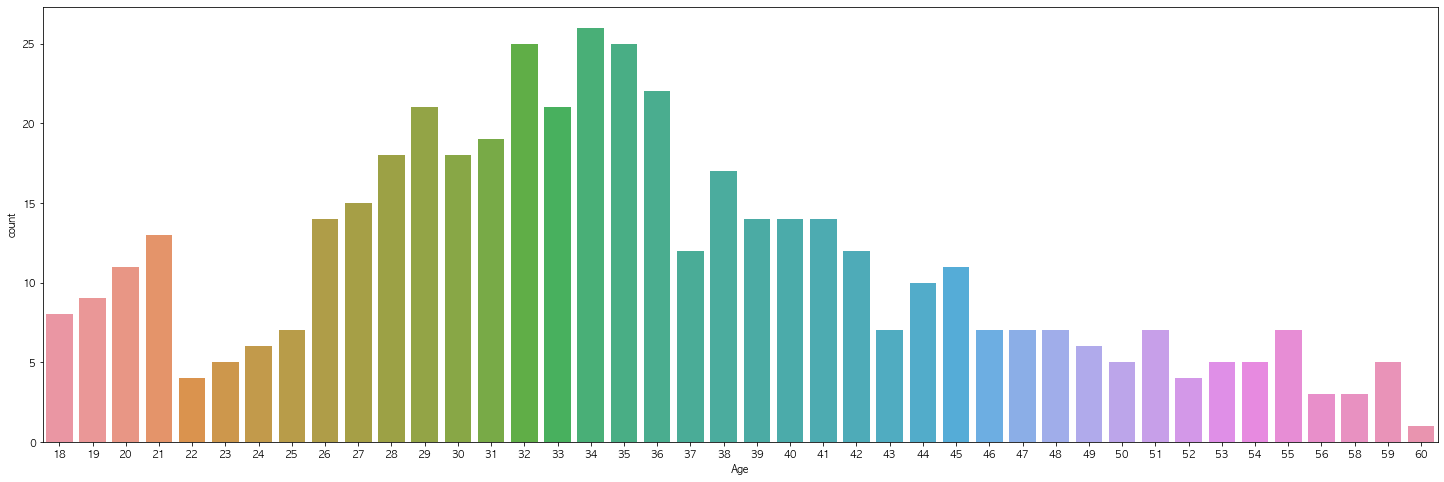

In [136]:
# 싱글인 직원들의 나이 분포
fig = plt.figure(figsize=(25,8))
sns.countplot(df[df['MaritalStatus']=='Single']['Age'],data=df)
plt.show()

* 전체 사원과 싱글인 사원들의 근무연수 분포 그래프

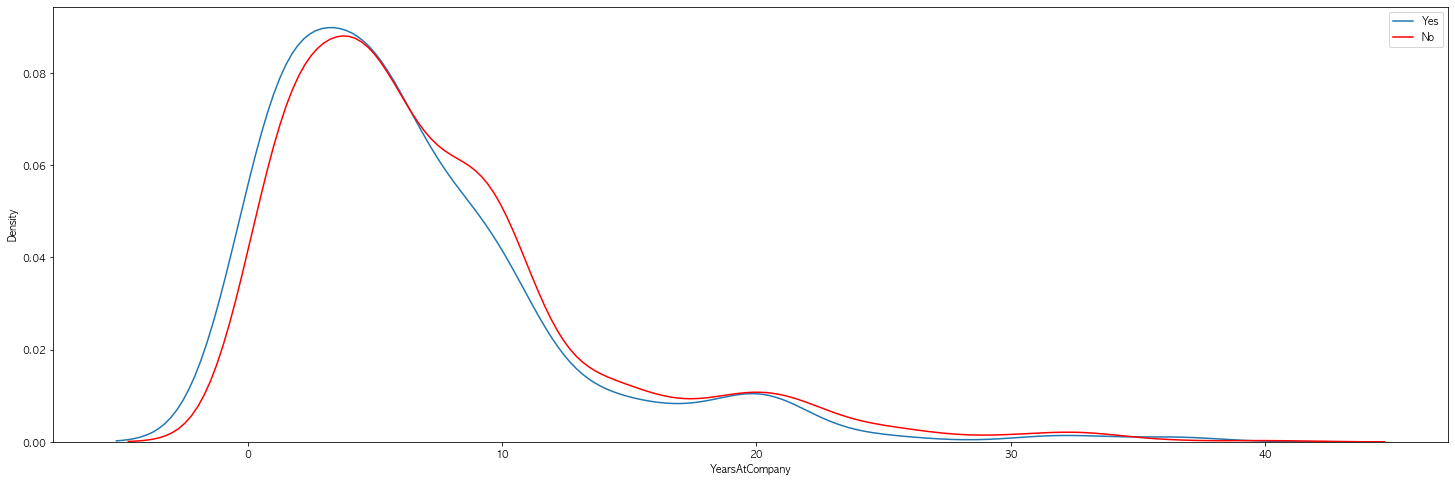

In [137]:
# 싱글인 사원들과 싱글이 아닌 사원들의 근무연수 분포 그래프 

fig = plt.figure(figsize=(25,8))
# sns.countplot(df[df['MaritalStatus']=='Single']['YearsAtCompany'],data=df)
sns.distplot(df[df['MaritalStatus']=='Single']['YearsAtCompany'],kde=True,hist=False,hist_kws=({'alpha':1}),label='Yes')
sns.distplot(df[df['MaritalStatus']!='Single']['YearsAtCompany'],kde=True,hist=False,kde_kws=({'color':'red'}),label='No')
plt.legend()
plt.show()

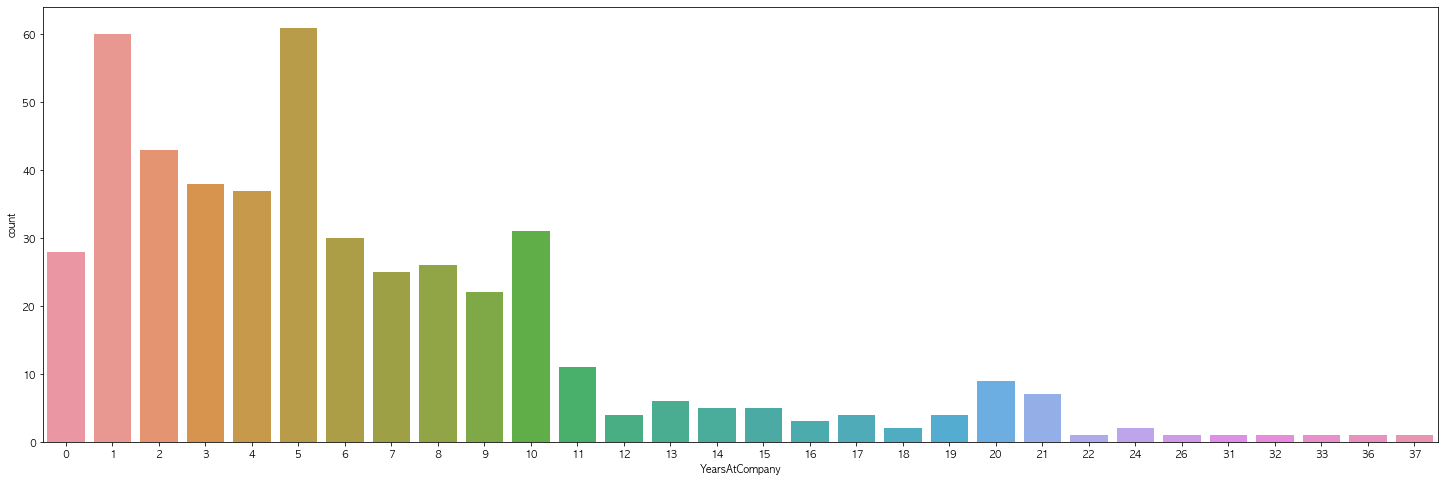

In [138]:
# 싱글인 사람들의 근속연수

fig = plt.figure(figsize=(25,8))
sns.countplot(df[df['MaritalStatus']=='Single']['YearsAtCompany'],data=df)
plt.show()

#### 그렇다면 데이터를 만들 때 미혼은 스톡옵션을 0으로 설정

---

In [139]:
# df_obj_copy_le # 범주형 변수
# df_copy[int_col] # 수치형 변수

# 전체 컬럼 상관계수 (범주형 변수 라벨인코더)
df_copy_corr = pd.concat([df_obj_copy_le,df_copy[int_col]],axis=1).corr()

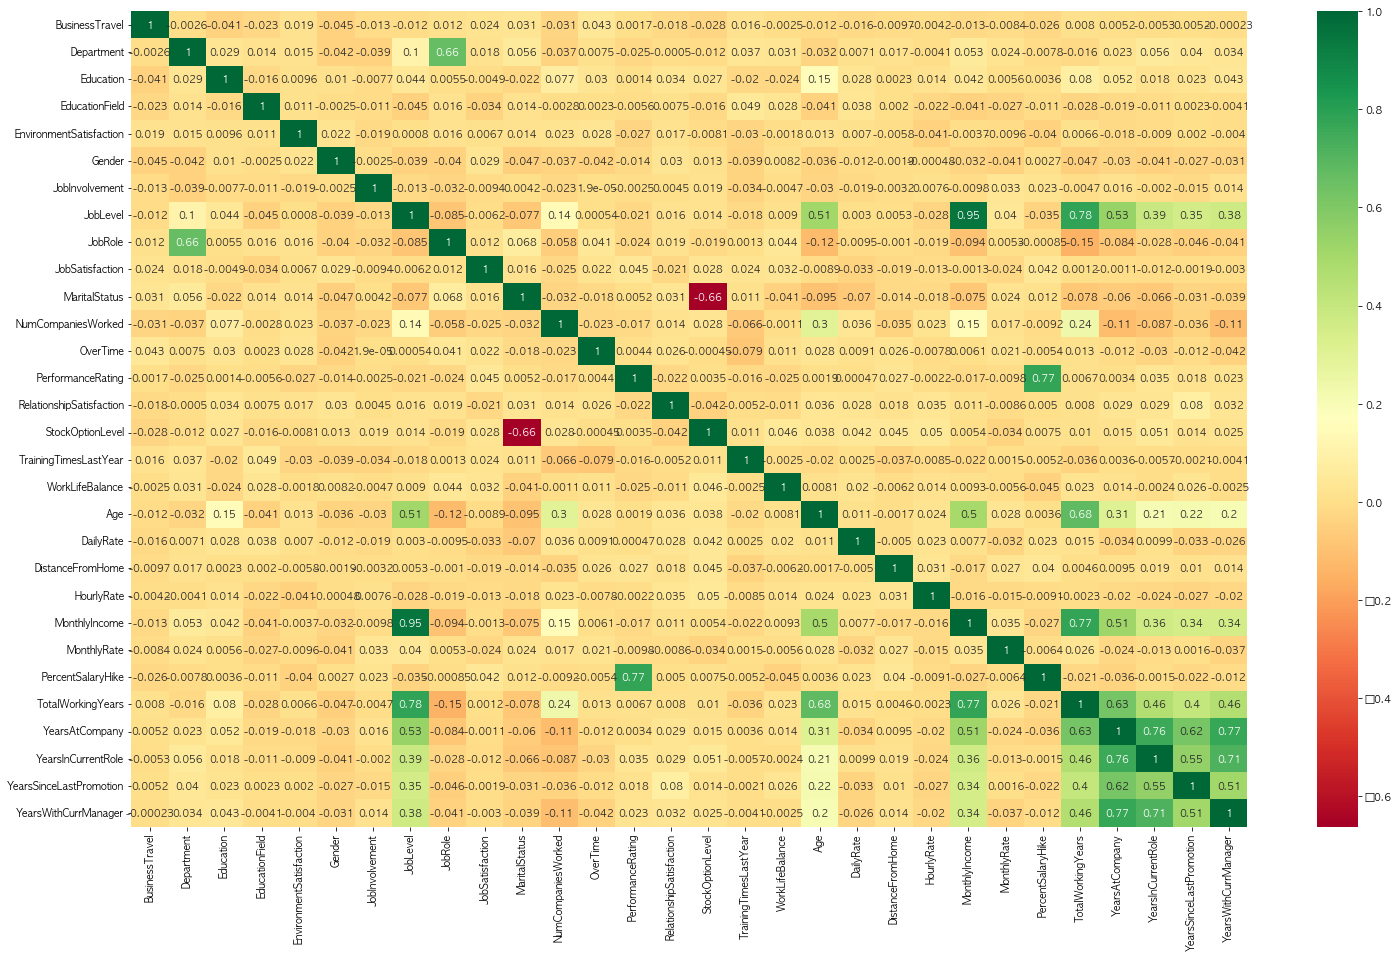

In [140]:
plt.figure(figsize=(25,15))
sns.heatmap(df_copy_corr,cmap='RdYlGn',annot=True)
plt.show()

In [141]:
# Attrition 포함된 전체 상관계수(라벨인코더)
# df_copy_var = pd.concat([df_obj_copy_le,df_copy[int_col]],axis=1)
df_le = pd.concat([att_le,pd.concat([df_obj_copy_le,df_copy[int_col]],axis=1)],axis=1)
df_le_corr = df_le.corr()

In [142]:
# 모든 변수와 퇴사자들간의 상관계수 그래프

att_corr = pd.concat([df_obj_copy_le,df_copy[int_col]],axis=1).corrwith(df_le['Attrition']).sort_values()

#### 퇴사자와 모든 변수 간의 상관계수 그래프

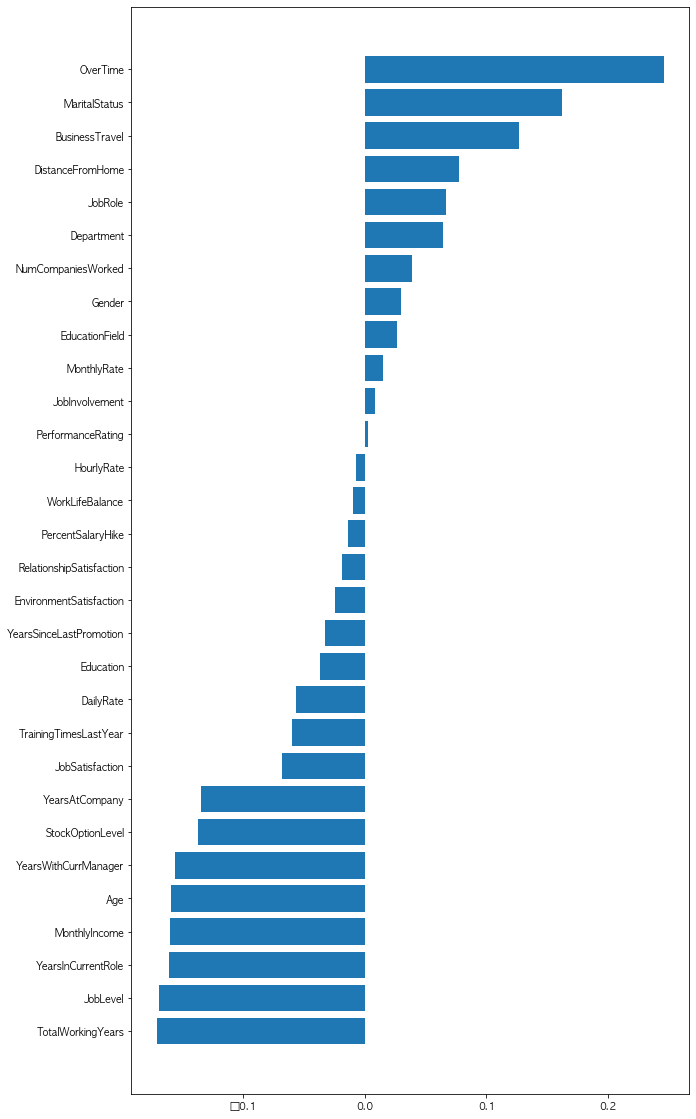

In [143]:
plt.figure(figsize=(10,20))
plt.barh(att_corr.index,att_corr.value_counts().index.sort_values())
plt.show()

#### 상관계수의 범위는 -1 부터 1 까지

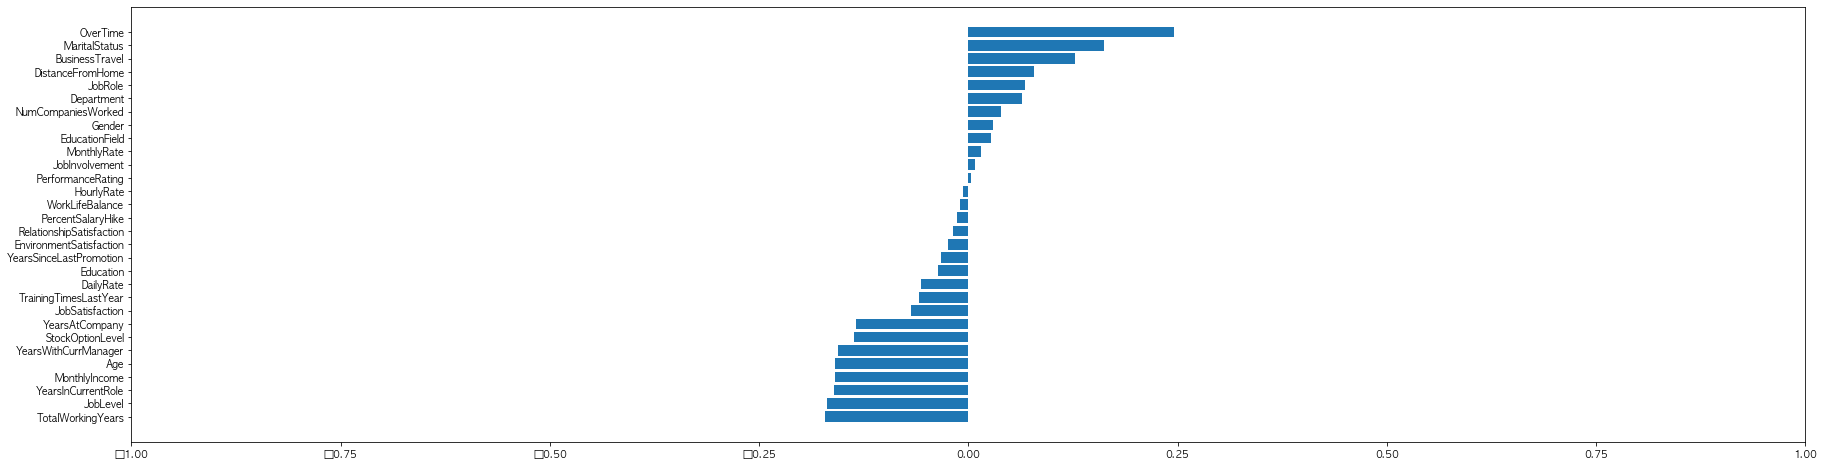

In [144]:
plt.figure(figsize=(30,8))
plt.barh(att_corr.index,att_corr.value_counts().index.sort_values())
plt.xlim(-1,1)
plt.show()

* 다중공선성(VIF) : 독립변수들 간에 높은 상관관계가 나타다는 문제.  
* 각각의 변수는 독립적이어야 좋지만 VIF가 높으면 다른 변수의 설명력이 떨어진다.

In [145]:
# VIF 값 확인
# VIF가 높다? -> 각각의 변수는 독립적이어야 좋지만 vif가 높으면 다른 변수의 설명력이 떨어진다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_copy_corr.values, i) for i in range(df_copy_corr.shape[1])]
vif['features'] = df_copy_corr.columns
vif.sort_values(by='VIF Factor',ascending=False)

# vif를 범주형, 수치형 따로 봐도 될까?
# joblevel 이 높으니까 지우고 다시 보자
# TotalWorkingYears도 지우자
# 전체 VIF

,VIF Factor,features
7,854.236677,JobLevel
22,765.924395,MonthlyIncome
25,114.124191,TotalWorkingYears
26,100.490404,YearsAtCompany
29,31.399936,YearsWithCurrManager
27,29.029386,YearsInCurrentRole
24,16.689399,PercentSalaryHike
13,16.536699,PerformanceRating
18,16.258049,Age
1,10.348237,Department


#### VIF가 높은 변수를 제거하고 다시 VIF를 확인하면?

In [147]:
# JobLevel 변수 제거하고 VIF

df_new = df_obj_copy_le.copy()
df_new.drop(['JobLevel'],axis=1,inplace=True)
df_new_corr = pd.concat([df_new,df_copy[int_col].drop(['TotalWorkingYears'],axis=1,inplace=True)],axis=1).corr()

vif_new = pd.DataFrame()
vif_new['VIF Factor'] = [variance_inflation_factor(df_new_corr.values, i) for i in range(df_new_corr.shape[1])]
vif_new['features'] = df_new_corr.columns
vif_new.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
9,6.855161,MaritalStatus
7,6.784879,JobRole
14,6.763208,StockOptionLevel
1,6.719392,Department
15,1.091693,TrainingTimesLastYear
10,1.086023,NumCompaniesWorked
11,1.072394,OverTime
5,1.064934,Gender
2,1.054330,Education
8,1.050173,JobSatisfaction


---

#### 수치형 변수 확인

In [148]:
df_copy['YearsDiffCompany'] = df_copy['TotalWorkingYears'] - df_copy['YearsAtCompany']

# 경력기간 컬럼 삭제, 다른 회사 기간 컬럼 추가
# df_copy.drop(['TotalWorkingYears'],axis=1,inplace=True) 
# int_col.remove('TotalWorkingYears')
# int_col.append('YearsDiffCompany')

#### 수치형 변수들의 이상치 확인

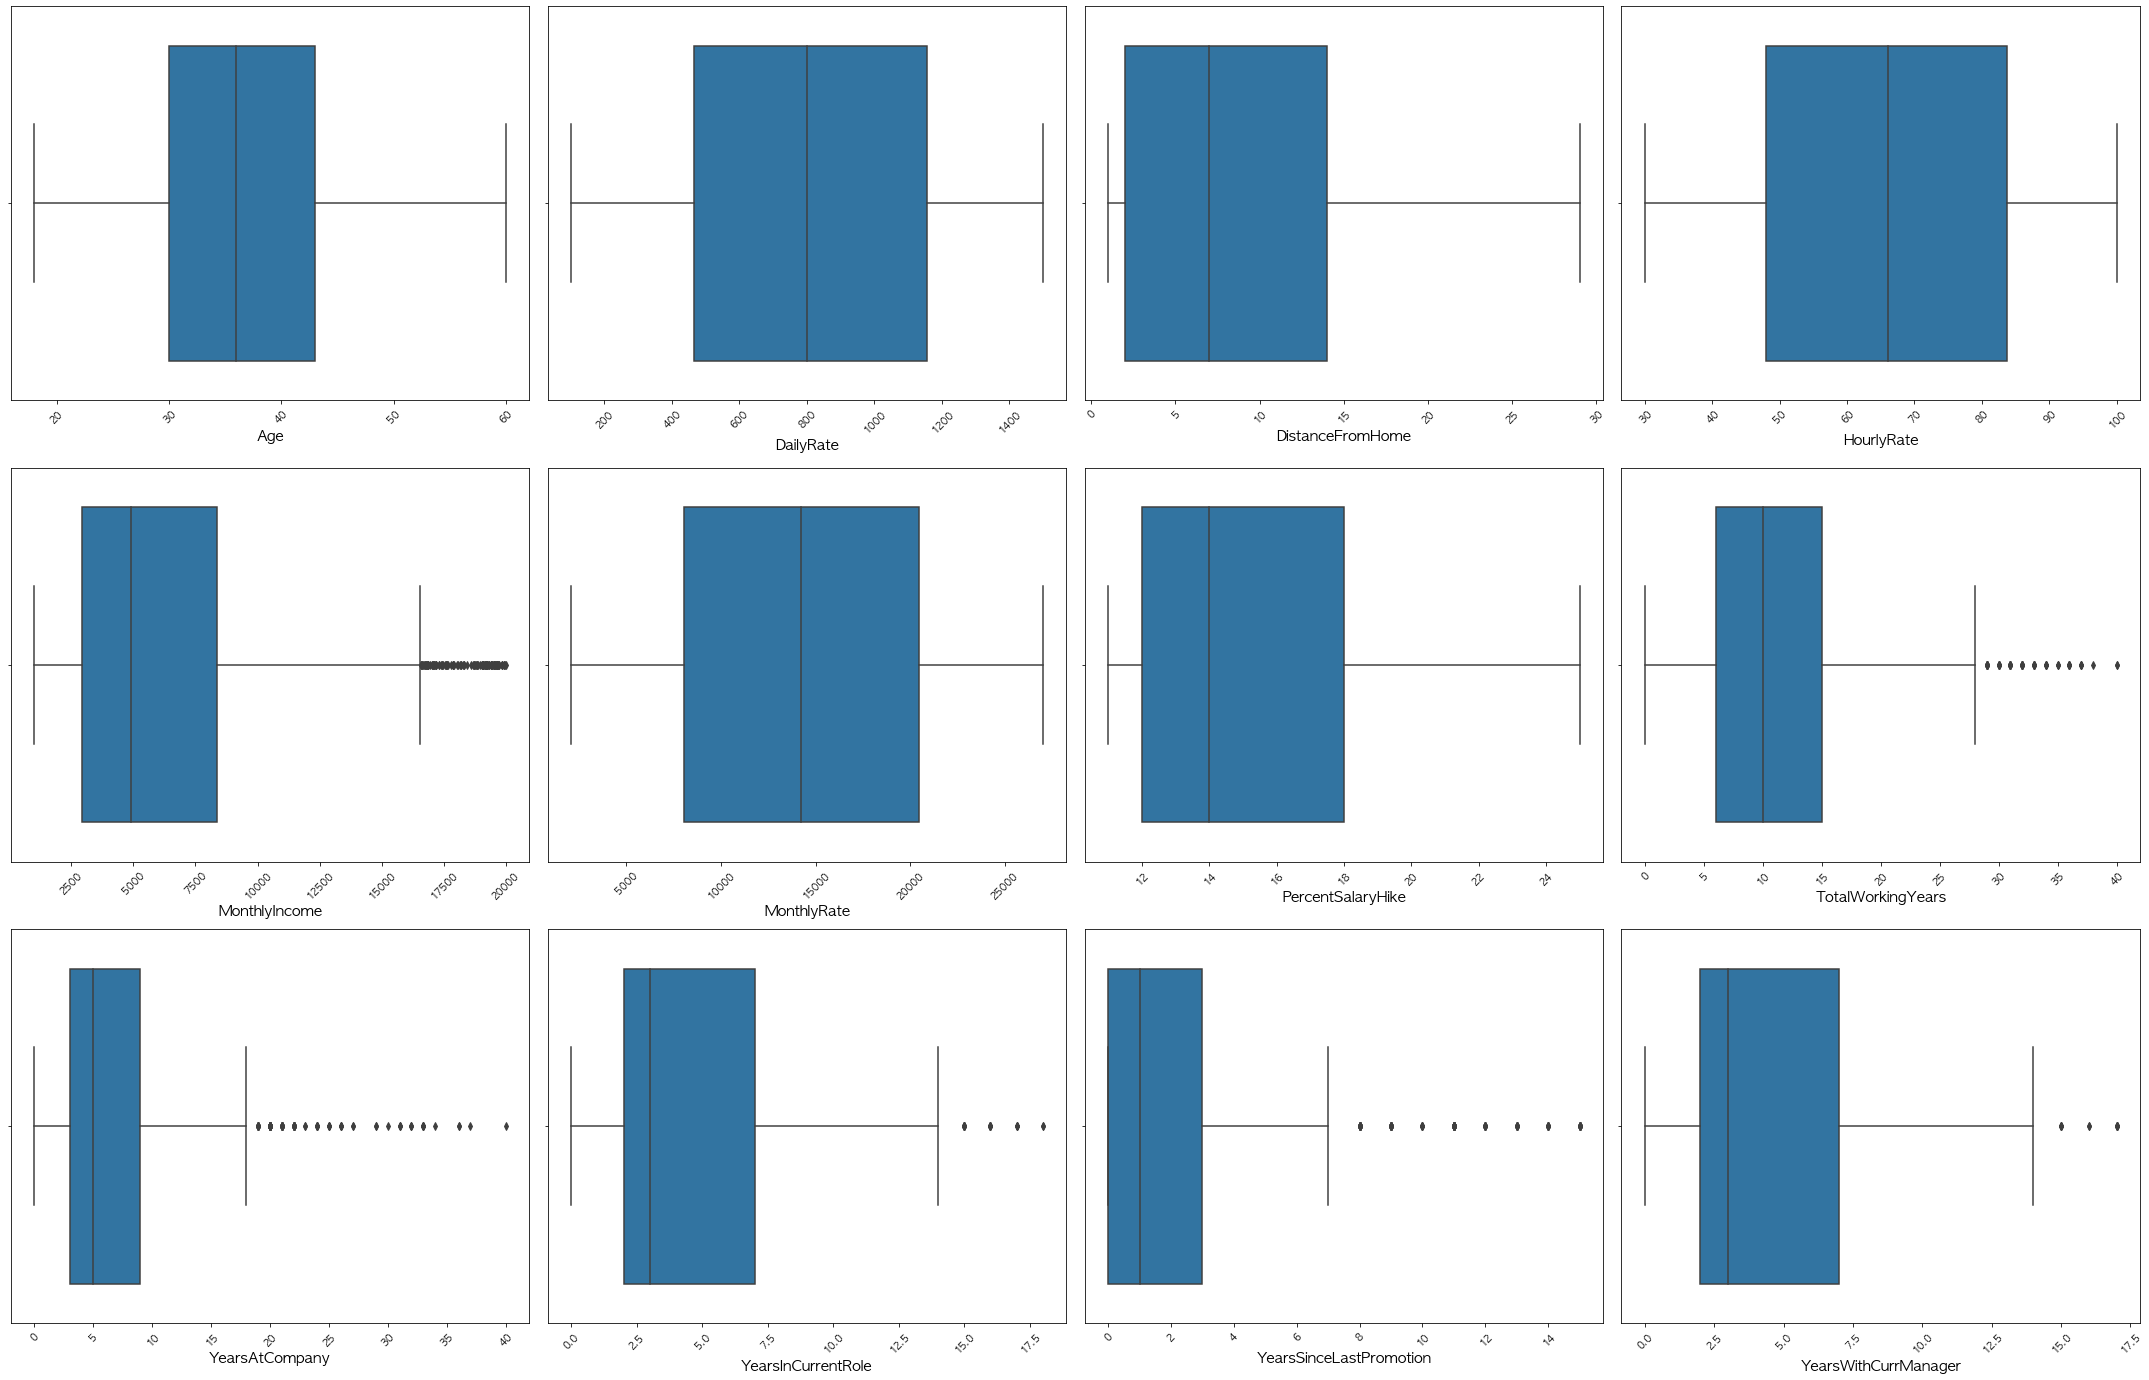

In [149]:
# 수치형 변수 - 이상치 확인

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    # sns.boxplot(df_copy['Attrition'],df_copy[int_col[i]],data=df)
    sns.boxplot(df_copy[int_col[i]],data=df)
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 12:
        break
    l += 1
fig.tight_layout()
plt.show()

근속연수가 40년인 직원 존재

In [150]:
df[df['YearsAtCompany']>35]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
98,58,No,Travel_Rarely,682,Sales,10,Master,Medical,Very High,Male,37,High,4,Sales Executive,High,Single,13872,24409,1,No,13,Excellent,High,0,38,1,Good,37,10,1,8
126,58,Yes,Travel_Rarely,147,Research & Development,23,Master,Medical,Very High,Female,94,High,3,Healthcare Representative,Very High,Married,10312,3465,1,No,12,Excellent,Very High,1,40,3,Good,40,10,15,6
270,55,No,Travel_Rarely,452,Research & Development,1,Bachelor,Medical,Very High,Male,81,High,5,Manager,Low,Single,19045,18938,1,Yes,14,Excellent,High,0,37,2,Better,36,10,4,13
1116,55,No,Travel_Rarely,685,Sales,26,Doctor,Marketing,High,Male,60,Medium,5,Manager,Very High,Married,19586,23037,1,No,21,Outstanding,High,1,36,3,Better,36,6,2,13


In [151]:
df[df['YearsAtCompany']>35][['YearsAtCompany','Age','NumCompaniesWorked']]

,YearsAtCompany,Age,NumCompaniesWorked
98,37,58,1
126,40,58,1
270,36,55,1
1116,36,55,1


In [152]:
df_copy[df_copy['TotalWorkingYears'] - df_copy['YearsAtCompany'] > 25][['Age','JobRole','YearsAtCompany']]

,Age,JobRole,YearsAtCompany
85,56,Manufacturing Director,6
105,59,Manager,3
401,56,Sales Executive,7
408,52,Manager,5
424,57,Manager,1
445,55,Manager,10
465,46,Healthcare Representative,2
534,53,Research Director,5
588,50,Research Director,4
624,53,Sales Executive,5


* 수치형 변수에 대해서 이상치 확인

In [153]:
# MonthlyIncome 이상치
q1 = np.percentile(df['MonthlyIncome'],25)
q3 = np.percentile(df['MonthlyIncome'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
monthlyincome_outlier = df[(df['MonthlyIncome'] < lf) | (df['MonthlyIncome'] > uf)]

# YearsAtCompany 이상치
q1 = np.percentile(df['YearsAtCompany'],25)
q3 = np.percentile(df['YearsAtCompany'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearsatcompany_outlier = df[(df['YearsAtCompany'] < lf) | (df['YearsAtCompany'] > uf)]

# YearsInCurrentRole 이상치
q1 = np.percentile(df['YearsInCurrentRole'],25)
q3 = np.percentile(df['YearsInCurrentRole'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearsincurrentrole_outlier = df[(df['YearsInCurrentRole'] < lf) | (df['YearsInCurrentRole'] > uf)]

# YearsSinceLastPromotion 이상치
q1 = np.percentile(df['YearsSinceLastPromotion'],25)
q3 = np.percentile(df['YearsSinceLastPromotion'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearssincelastpromotion_outlier = df[(df['YearsSinceLastPromotion'] < lf) | (df['YearsSinceLastPromotion'] > uf)]

# YearsWithCurrManager 이상치
q1 = np.percentile(df['YearsWithCurrManager'],25)
q3 = np.percentile(df['YearsWithCurrManager'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearswithcurrmanager_outlier = df[(df['YearsWithCurrManager'] < lf) | (df['YearsWithCurrManager'] > uf)]

# YearsDiffCompany 이상치
q1 = np.percentile(df_copy['YearsDiffCompany'],25)
q3 = np.percentile(df_copy['YearsDiffCompany'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr
yearsdiffcompany_outlier = df[(df_copy['YearsDiffCompany'] < lf) | (df_copy['YearsDiffCompany'] > uf)]

In [154]:
# 이상치의 타겟데이터 비율 그래프

def target_out(arg):
    print('이상치 데이터의 퇴사 비율')
    print('Yes :',round(arg['Attrition'].value_counts()[1] / arg['Attrition'].value_counts().sum() * 100 , 2),'%')
    print('No :',round(arg['Attrition'].value_counts()[0] / arg['Attrition'].value_counts().sum() * 100 , 2),'%')

In [155]:
# 월소득 이상치에 따른 퇴사 비율

target_out(monthlyincome_outlier)

이상치 데이터의 퇴사 비율
Yes : 4.39 %
No : 95.61 %


##### 이상치가 모수의 비율보다 한쪽으로 몰려있어서 삭제하지 않는다.

In [156]:
# 근속연수에 따른 퇴사 비율

target_out(yearsatcompany_outlier)

이상치 데이터의 퇴사 비율
Yes : 9.62 %
No : 90.38 %


##### 이상치가 실제 특성을 반영할 수 있어서 삭제하지 않는다.

In [157]:
# 현재 직무의 연수에 따른 퇴사 비율

target_out(yearsincurrentrole_outlier)

이상치 데이터의 퇴사 비율
Yes : 9.52 %
No : 90.48 %


##### 이상치가 실제 특성을 반영할 수 있어서 삭제하지 않는다.

In [158]:
# 마지막 프로모션에 따른 퇴사 비율

target_out(yearssincelastpromotion_outlier)

이상치 데이터의 퇴사 비율
Yes : 12.15 %
No : 87.85 %


##### 이상치가 모수의 비율과 비슷하므로 삭제

In [159]:
# 현재 매니저와의 기간에 따른 퇴사 비율

print('No :',round(yearswithcurrmanager_outlier['Attrition'].value_counts()[0] / yearswithcurrmanager_outlier['Attrition'].value_counts().sum() * 100 , 2),'%')

No : 100.0 %


##### 이상치가 실제특성을 가질 수 있어서 제거하지 않는다.

In [160]:
# 타사 근무기간에 따른 퇴사 비율

target_out(yearsdiffcompany_outlier)

이상치 데이터의 퇴사 비율
Yes : 9.64 %
No : 90.36 %


#### 이상치 데이터 제거

In [161]:
# outlier = pd.concat([monthlyincome_outlier,totalworkingyears_outlier,trainingtimeslastyear_outlier,yearsatcompany_outlier,yearsincurrentrole_outlier,yearssincelastpromotion_outlier,yearswithcurrmanager_outlier]).drop_duplicates()

# df_copy.drop(index=yearssincelastpromotion_outlier.index,inplace=True)

---

### 예측 모델링에 필요한 패키지

In [162]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
import xgboost as xgb

* 변수 스케일링 및 라벨인코더

In [163]:
# 스케일링 및 라벨인코더

df_copy[int_col] = RobustScaler().fit_transform(df_copy[int_col])

object_le = LabelEncoder()
df[object_col].apply(object_le.fit_transform)

x = pd.concat([df[object_col].apply(object_le.fit_transform),df_copy[int_col]],axis=1)
x.drop(index=yearssincelastpromotion_outlier.index,inplace=True) 

In [164]:
# target data(종속변수)

target = x['Attrition']
x.drop('Attrition',axis=1,inplace=True)

* train, test set 분리

In [165]:
# train , test set 분리

x_train, x_test, y_train, y_test = train_test_split(x,target,test_size=0.2,random_state=42,stratify=target)

In [166]:
# 퇴사 여부 비율

# df['Attrition'].value_counts()
print('전체 직원들의 퇴사 비율')
print('Yes :',round(len(df[df['Attrition']=='Yes']) / len(df) * 100, 2),'%')
print('No :',round(len(df[df['Attrition']=='No']) / len(df) * 100, 2),'%')

전체 직원들의 퇴사 비율
Yes : 16.12 %
No : 83.88 %


In [167]:
# 학습데이터, 테스트 데이터에서의 퇴사 비율
print('학습 데이터에서의 퇴사 비율')
print('Yes :',round(len(y_train[y_train==1]) / len(y_train) * 100, 2),'%')
print('No :',round(len(y_train[y_train==0]) / len(y_train) * 100, 2),'%')

print('테스트 데이터에서의 퇴사 비율')
print('Yes :',round(len(y_test[y_test==1]) / len(y_test) * 100, 2),'%')
print('No :',round(len(y_test[y_test==0]) / len(y_test) * 100, 2),'%')

학습 데이터에서의 퇴사 비율
Yes : 16.42 %
No : 83.58 %
테스트 데이터에서의 퇴사 비율
Yes : 16.48 %
No : 83.52 %


In [168]:
# 모델 성능

def score(y_test,y_pred):
    
    print('Accuracy :',round(accuracy_score(y_test,y_pred) , 2))
    print('F1-score :',round(f1_score(y_test,y_pred) ,2))

---

### 예측 모델링

#### LogisticRegression Model

In [169]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

# 정확도 저장
accuracy = []
accuracy.append({'model':'LogisticRegression',
                 'accuracy':round(accuracy_score(y_test,y_pred),2)})

model_score = []
model_score.append({'model':'LogisticRegression',
                    'accuracy':round(accuracy_score(y_test,y_pred),2),
                    'f1-score':round(f1_score(y_test,y_pred),2)})
score(y_test,y_pred)

Accuracy : 0.86
F1-score : 0.39


* LogisticRegression Model 변수 중요도

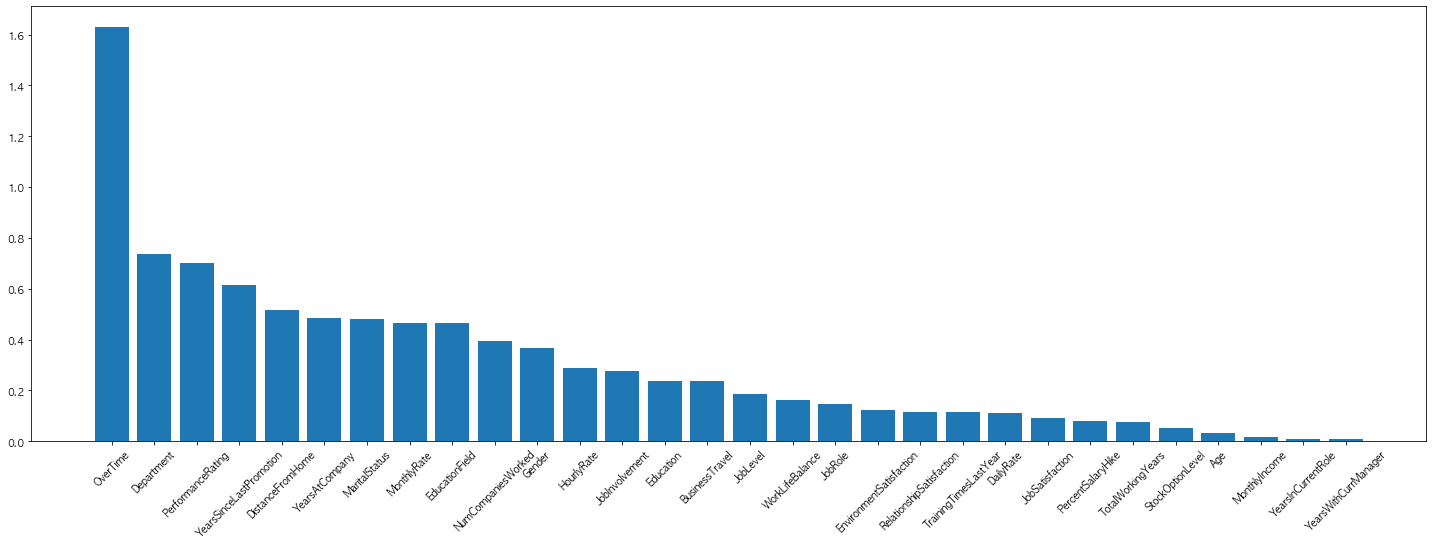

In [170]:
# LogisticRegression Model의 변수 중요도
pd.DataFrame({'feature':x.columns, 'importance':lr_model.coef_[0]}).sort_values(by='importance',ascending=False).T
lr_imp = pd.DataFrame({'feature':x.columns, 'importance':lr_model.coef_[0]}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(lr_imp['feature'],np.abs((lr_imp['importance'])).sort_values(ascending=False))
plt.xticks(rotation=45)
plt.show()

---

#### DecisionTree Model

In [171]:
clf_model = DecisionTreeClassifier(random_state=42)
clf_model.fit(x_train,y_train)
y_pred = clf_model.predict(x_test)

# 정확도 저장
accuracy.append({'model':'DecisionTreeClassifier',
                 'accuracy':round(accuracy_score(y_test,y_pred),2)})
model_score.append({'model':'DecisionTreeClassifier',
                    'accuracy':round(accuracy_score(y_test,y_pred),2),
                    'f1-score':round(f1_score(y_test,y_pred),2)})

# print(classification_report(y_test,y_pred))
score(y_test,y_pred)

Accuracy : 0.77
F1-score : 0.39


* DecisionTree Model 변수 중요도

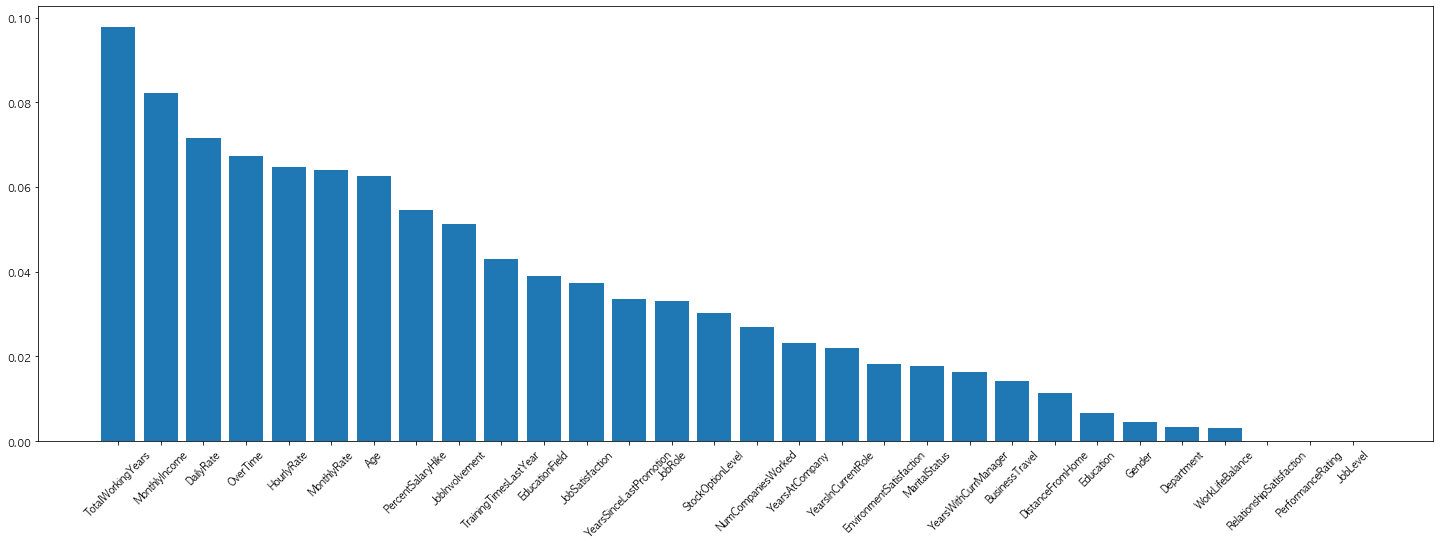

In [172]:
# DesisionTree Model 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':clf_model.feature_importances_}).sort_values(by='importance',ascending=False).T
clf_imp = pd.DataFrame({'feature':x.columns, 'importance':clf_model.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(clf_imp['feature'],clf_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### RandomForest Model

In [173]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)

# 정확도 저장
accuracy.append({'model':'RandomForestClassifier',
                 'accuracy':round(accuracy_score(y_test,y_pred),2)})

model_score.append({'model':'RandomForestClassifier',
                    'accuracy':round(accuracy_score(y_test,y_pred),2),
                    'f1-score':round(f1_score(y_test,y_pred),2)})

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
score(y_test,y_pred)

Accuracy : 0.85
F1-score : 0.32


* RandomForest Model 변수 중요도

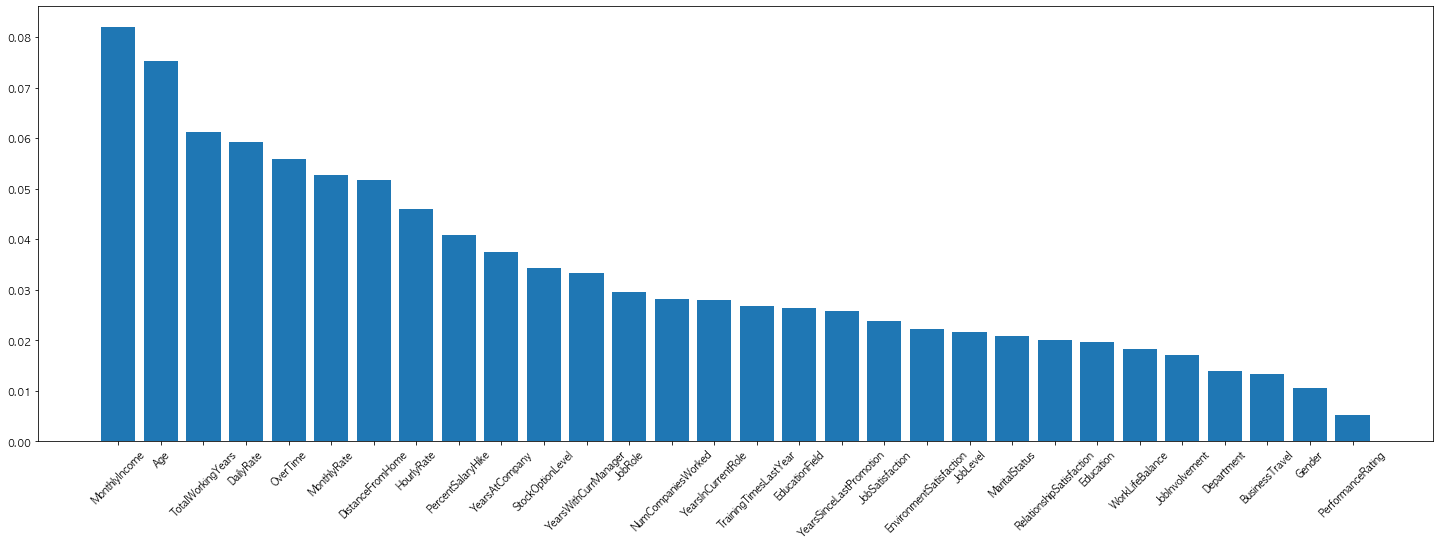

In [174]:
# RandomForest Model 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':rf_model.feature_importances_}).sort_values(by='importance',ascending=False).T
rf_imp = pd.DataFrame({'feature':x.columns, 'importance':rf_model.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(rf_imp['feature'],rf_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### XGBoost

In [175]:
# xgboost 모델

xgb_model = xgb.XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='logloss')
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)

# 정확도 저장
accuracy.append({'model':'XGBClassifier',
                 'accuracy':round(accuracy_score(y_test,y_pred),2)})
model_score.append({'model':'XGBClassifier',
                    'accuracy':round(accuracy_score(y_test,y_pred),2),
                    'f1-score':round(f1_score(y_test,y_pred),2)})

# print(classification_report(y_test,y_pred))
score(y_test,y_pred)

Accuracy : 0.85
F1-score : 0.42


* XGBoost Model 변수 중요도

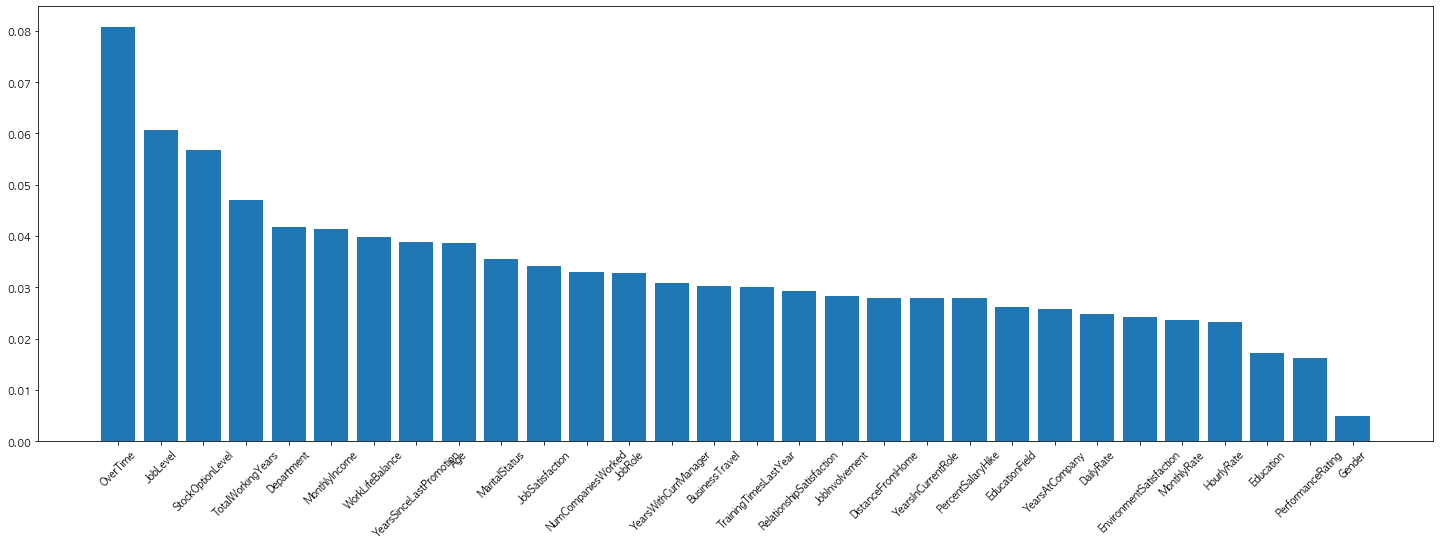

In [176]:
# XGBoost Model 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':xgb_model.feature_importances_}).sort_values(by='importance',ascending=False).T
xgb_imp = pd.DataFrame({'feature':x.columns, 'importance':xgb_model.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(xgb_imp['feature'],xgb_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### LogisticRegression Model HyperParameter

In [177]:
# LogisticRegression Model HyperParameter

lr_model = LogisticRegression(random_state=42)
param_grid = {'C':[0.01,0.1,1,5,10],
             'max_iter':[100,250,500,1000,5000,10000,30000]}
grid_cv = GridSearchCV(lr_model,param_grid = param_grid, cv=5, n_jobs=-1)
grid_cv.fit(x_train,y_train)

lr_model_hyper = grid_cv.best_estimator_
lr_hyper_pred = lr_model_hyper.predict(x_test)
print('=======================================================')
print('hyper parameter 적용 후 테스트 데이터에 대한 정확도')
print(' ')
# print(classification_report(y_test,lr_hyper_pred))
score(y_test,lr_hyper_pred)

# 정확도 저장
accuracy_hyper = []
accuracy_hyper.append({'model':'LogisticRegression',
                 'accuracy':round(accuracy_score(y_test,lr_hyper_pred),2)})
model_hyper_score = []
model_hyper_score.append({'model':'LogisticRegression',
                          'accuracy':round(accuracy_score(y_test,lr_hyper_pred),2),
                    'f1-score':round(f1_score(y_test,lr_hyper_pred),2)})


hyper parameter 적용 후 테스트 데이터에 대한 정확도
 
Accuracy : 0.86
F1-score : 0.39


* LogisticRegression Model HyperParameter 변수 중요도

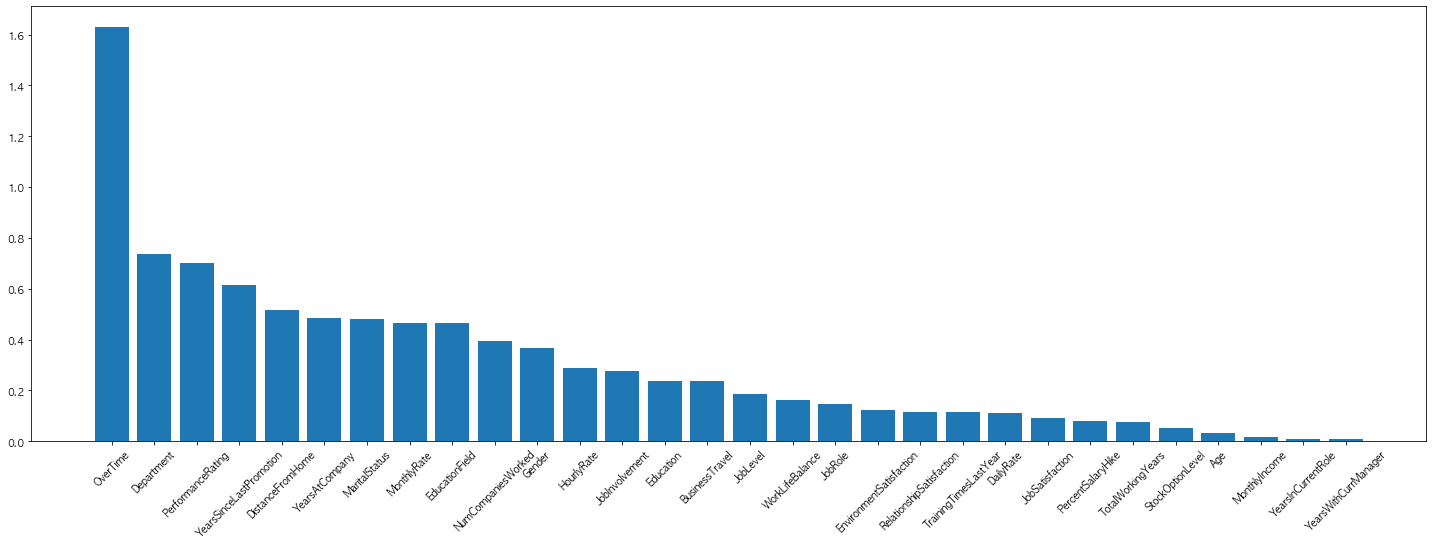

In [178]:
#LogisticRegression Model HyperParameter 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':lr_model_hyper.coef_[0]}).sort_values(by='importance',ascending=False).T
lr_hyper_imp = pd.DataFrame({'feature':x.columns, 'importance':lr_model_hyper.coef_[0]}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(lr_hyper_imp['feature'],np.abs((lr_hyper_imp['importance'])).sort_values(ascending=False))
plt.xticks(rotation=45)
plt.show()

---

#### DecisionTree Model HyperParameter

In [179]:
# DecisionTree Model HyperParameter

clf_model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth':[4,6,8,10,12],
             'min_samples_leaf':[6,8,12,18],
             'min_samples_split':[4,6,8,16,20]}
grid_cv = GridSearchCV(clf_model,param_grid = param_grid,cv=5,n_jobs=-1,refit=True,return_train_score=True)

grid_cv.fit(x_train,y_train)
# print(pd.DataFrame(grid_cv.cv_results_)[['params','mean_test_score','rank_test_score']])

clf_model_hyper = grid_cv.best_estimator_ # 최적화 값을 가지고 다시 예측
clf_hyper_pred = clf_model_hyper.predict(x_test)
print('=======================================================')
print('hyper parameter 적용 후 테스트 데이터에 대한 정확도')
print(' ')
# print(classification_report(y_test,clf_hyper_pred))
score(y_test,clf_hyper_pred)

# 정확도 저장
accuracy_hyper.append({'model':'DecisionTreeClassifier',
                 'accuracy':round(accuracy_score(y_test,clf_hyper_pred),2)})
model_hyper_score.append({'model':'DecisionTreeClassifier',
                          'accuracy':round(accuracy_score(y_test,clf_hyper_pred),2),
                    'f1-score':round(f1_score(y_test,clf_hyper_pred),2)})

grid_cv.best_params_

hyper parameter 적용 후 테스트 데이터에 대한 정확도
 
Accuracy : 0.83
F1-score : 0.32


{'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 4}

* DecisionTree Model HyperParameter 변수 중요도

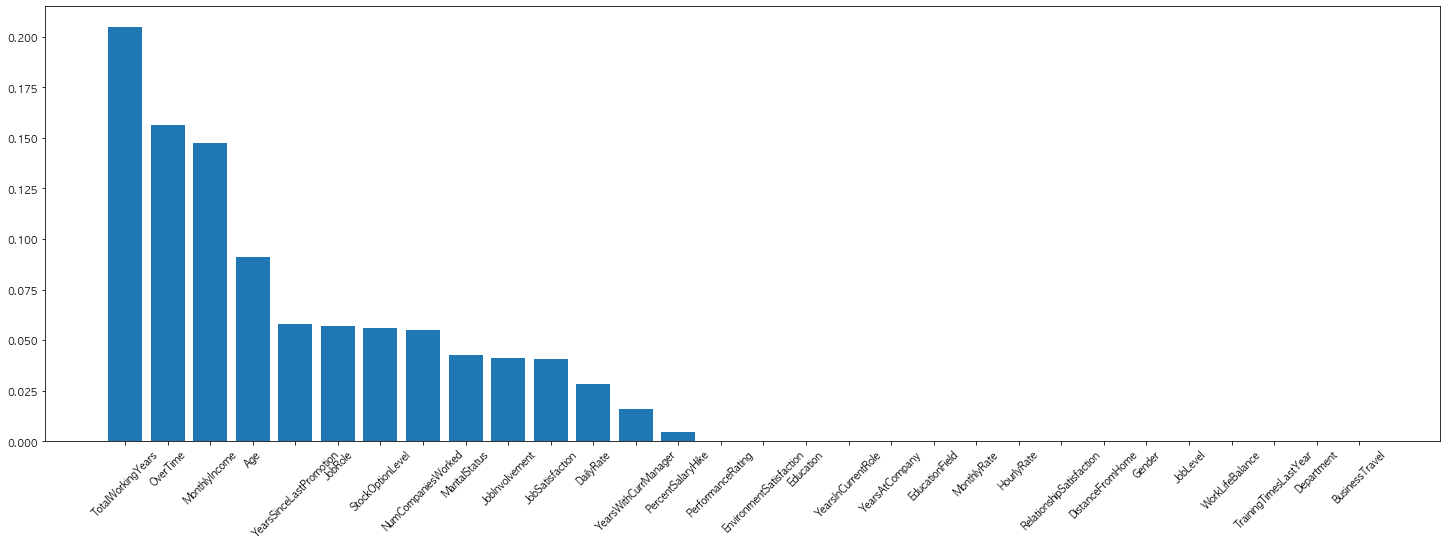

In [180]:
#DecisionTree Model HyperParameter 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':clf_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False).T
clf_hyper_imp = pd.DataFrame({'feature':x.columns, 'importance':clf_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(clf_hyper_imp['feature'],clf_hyper_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### RandomForest Model HyperParameter

In [181]:
# RandomForest Model HyperParameter

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[10,100],
              'max_depth':[4,6,8,10,12],
             'min_samples_leaf':[1,2,4,6,8,12,18],
             'min_samples_split':[2,4,6,8,16,20,24,26]}
grid_cv = GridSearchCV(rf_model,param_grid = param_grid,cv=5,n_jobs=-1)
grid_cv.fit(x_train,y_train)

rf_model_hyper = grid_cv.best_estimator_ # 최적화 값
rf_hyper_pred = rf_model_hyper.predict(x_test)
print('=======================================================')
print('hyper parameter 적용 후 테스트 데이터에 대한 정확도')
print(' ')
# print(classification_report(y_test,rf_hyper_pred))
# print(confusion_matrix(y_test,rf_hyper_pred))
score(y_test,rf_hyper_pred)

# 정확도 저장
accuracy_hyper.append({'model':'RandomForestClassifier',
                 'accuracy':round(accuracy_score(y_test,rf_hyper_pred),2)})
model_hyper_score.append({'model':'RandomForestClassifier',
                          'accuracy':round(accuracy_score(y_test,rf_hyper_pred),2),
                    'f1-score':round(f1_score(y_test,rf_hyper_pred),2)})

# grid_cv.best_params_

hyper parameter 적용 후 테스트 데이터에 대한 정확도
 
Accuracy : 0.85
F1-score : 0.31


* RandomForest Model HyperParameter 변수 중요도

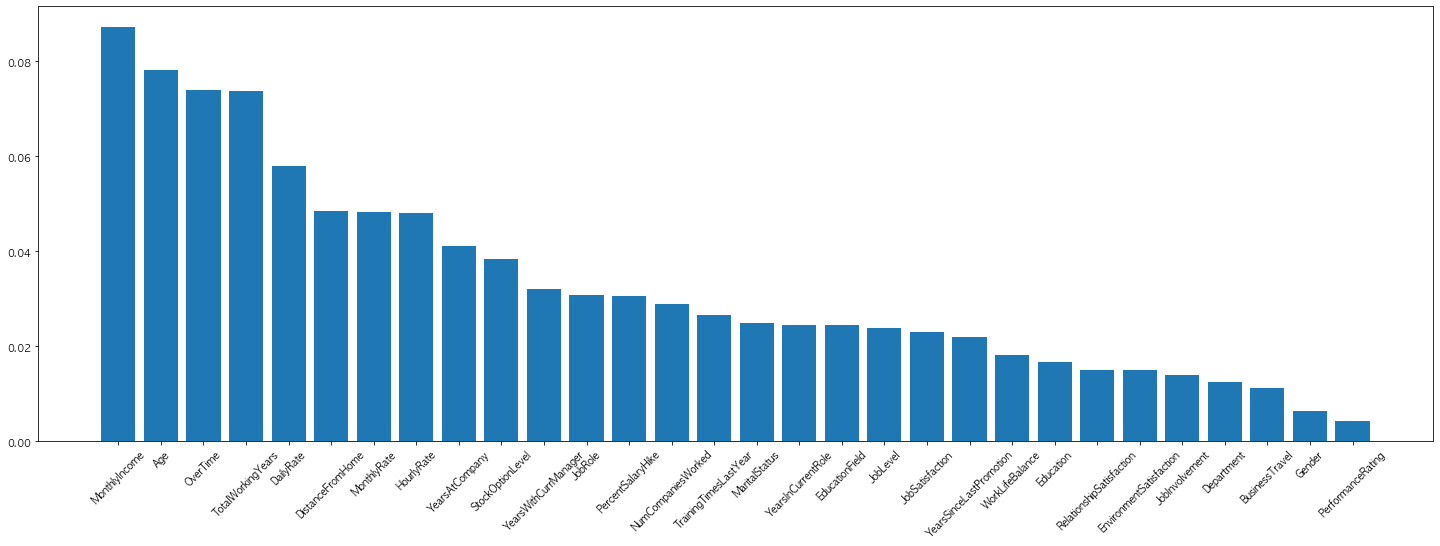

In [182]:
# RandomForest Model HyperParameter 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':rf_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False).T
rf_hyper_imp = pd.DataFrame({'feature':x.columns, 'importance':rf_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(rf_hyper_imp['feature'],rf_hyper_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### XGBoost HyperParameter

In [183]:
# XGBoost HyperParameter

xgb_model = xgb.XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='logloss')
param_grid = {'booster':['gbtree'],
              'max_depth':[6,8,10,12],
              'min_child_weight':[8,12,18],
              'objective':['binary:logistic']}
grid_cv = GridSearchCV(xgb_model,param_grid = param_grid, cv=5, n_jobs=-1)
grid_cv.fit(x_train,y_train)

xgb_model_hyper = grid_cv.best_estimator_ # 최적화 값
xgb_hyper_pred = xgb_model_hyper.predict(x_test)
accuracy_score(y_test,xgb_hyper_pred)
print('=======================================================')
print('hyper parameter 적용 후 테스트 데이터에 대한 정확도')
print(' ')
# print(classification_report(y_test,xgb_hyper_pred))
score(y_test,xgb_hyper_pred)

# 정확도 저장
accuracy_hyper.append({'model':'XGBClassifier',
                 'accuracy':round(accuracy_score(y_test,xgb_hyper_pred),2)})
model_hyper_score.append({'model':'XGBClassifier',
                          'accuracy':round(accuracy_score(y_test,xgb_hyper_pred),2),
                    'f1-score':round(f1_score(y_test,xgb_hyper_pred),2)})

hyper parameter 적용 후 테스트 데이터에 대한 정확도
 
Accuracy : 0.85
F1-score : 0.43


* XGBoost Model HyperParameter 변수 중요도

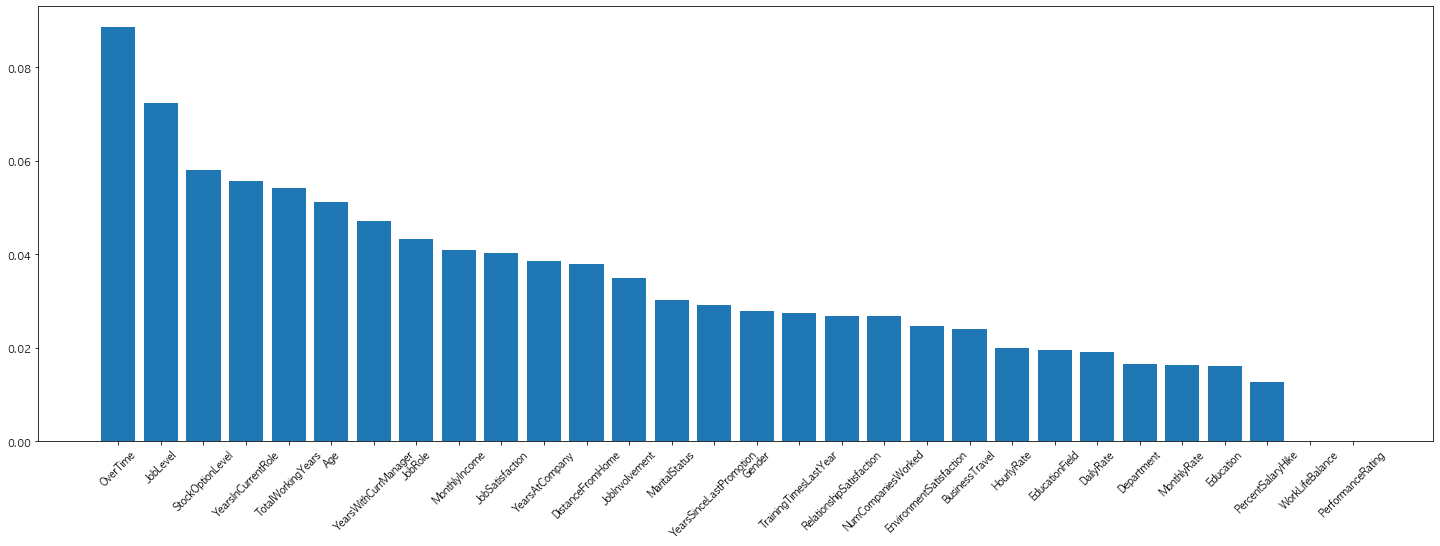

In [184]:
# XGBoost Model HyperParameter 변수 중요도

pd.DataFrame({'feature':x.columns, 'importance':xgb_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False).T
xgb_hyper_imp = pd.DataFrame({'feature':x.columns, 'importance':xgb_model_hyper.feature_importances_}).sort_values(by='importance',ascending=False)

fig = plt.figure(figsize=(25,8))
plt.bar(xgb_hyper_imp['feature'],xgb_hyper_imp['importance'])
plt.xticks(rotation=45)
plt.show()

---

#### Accuracy 비교 그래프

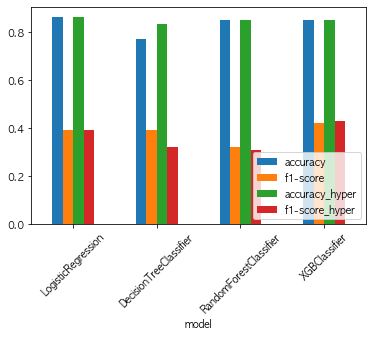

,accuracy,f1-score,accuracy_hyper,f1-score_hyper
model,,,,
LogisticRegression,0.86,0.39,0.86,0.39
DecisionTreeClassifier,0.77,0.39,0.83,0.32
RandomForestClassifier,0.85,0.32,0.85,0.31
XGBClassifier,0.85,0.42,0.85,0.43


In [185]:
model_score_df = pd.merge(pd.DataFrame(model_score),pd.DataFrame(model_hyper_score),on='model')
model_score_df.rename(columns={'accuracy_x':'accuracy','f1-score_x':'f1-score','accuracy_y':'accuracy_hyper','f1-score_y':'f1-score_hyper'},inplace=True)
model_score_df.set_index(keys='model',drop=True,inplace=True)
model_score_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()
model_score_df

In [186]:
# vif 변수 제거 후

df_new_copy = df.copy()

df_copy[int_col] = StandardScaler().fit_transform(df_copy[int_col])

object_le = LabelEncoder()
df_new_copy[object_col].apply(object_le.fit_transform)
# df_new_copy.drop('JobLevel',axis=1,inplace=True)

x_new = pd.concat([df_new_copy[object_col].apply(object_le.fit_transform),df_copy[int_col]],axis=1)
# target data(종속변수)
x_new.drop(index=yearssincelastpromotion_outlier.index,inplace=True)
target_new = x_new['Attrition']
x_new.drop('Attrition',axis=1,inplace=True)
x_new.drop('JobLevel',axis=1,inplace=True)
x_new.drop('TotalWorkingYears',axis=1,inplace=True)


#### VIF 변수 제거 후 Accuracy

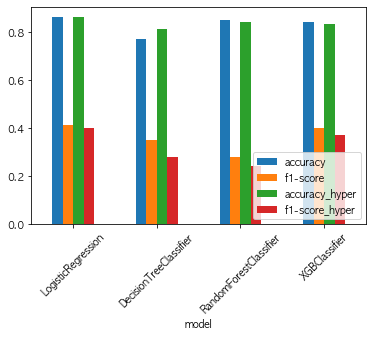

,accuracy,f1-score,accuracy_hyper,f1-score_hyper
model,,,,
LogisticRegression,0.86,0.41,0.86,0.40
DecisionTreeClassifier,0.77,0.35,0.81,0.28
RandomForestClassifier,0.85,0.28,0.84,0.24
XGBClassifier,0.84,0.40,0.83,0.37


In [187]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new,target_new,test_size=0.2,random_state=42,stratify=target_new)

lr_new_model = LogisticRegression(random_state=42)
lr_new_model.fit(x_new_train,y_new_train)
y_new_pred = lr_new_model.predict(x_new_test)

# 정확도 저장
model_score_new = []
model_score_new.append({'model':'LogisticRegression',
                    'accuracy':round(accuracy_score(y_new_test,y_new_pred),2),
                    'f1-score':round(f1_score(y_new_test,y_new_pred),2)})

clf_new_model = DecisionTreeClassifier(random_state=42)
clf_new_model.fit(x_new_train,y_new_train)
y_new_pred = clf_new_model.predict(x_new_test)
# 정확도 저장
model_score_new.append({'model':'DecisionTreeClassifier',
                    'accuracy':round(accuracy_score(y_new_test,y_new_pred),2),
                    'f1-score':round(f1_score(y_new_test,y_new_pred),2)})

rf_new_model = RandomForestClassifier(random_state=42)
rf_new_model.fit(x_new_train,y_new_train)
y_new_pred = rf_new_model.predict(x_new_test)
# 정확도 저장
model_score_new.append({'model':'RandomForestClassifier',
                    'accuracy':round(accuracy_score(y_new_test,y_new_pred),2),
                    'f1-score':round(f1_score(y_new_test,y_new_pred),2)})

xgb_new_model = xgb.XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='logloss')
xgb_new_model.fit(x_new_train,y_new_train)
y_new_pred = xgb_new_model.predict(x_new_test)
# 정확도 저장
model_score_new.append({'model':'XGBClassifier',
                    'accuracy':round(accuracy_score(y_new_test,y_new_pred),2),
                    'f1-score':round(f1_score(y_new_test,y_new_pred),2)})


# 하이퍼파라미터
lr_model = LogisticRegression(random_state=42)
param_grid = {'C':[0.01,0.1,1,5,10],
             'max_iter':[100,250,500,1000,5000,10000,30000]}
grid_cv = GridSearchCV(lr_model,param_grid = param_grid, cv=5, n_jobs=-1)
grid_cv.fit(x_new_train,y_new_train)
lr_model_hyper = grid_cv.best_estimator_
lr_hyper_pred = lr_model_hyper.predict(x_new_test)
# 정확도 저장
model_hyper_score_new = []
model_hyper_score_new.append({'model':'LogisticRegression',
                          'accuracy':round(accuracy_score(y_new_test,lr_hyper_pred),2),
                    'f1-score':round(f1_score(y_new_test,lr_hyper_pred),2)})

# DecisionTree Model HyperParameter
clf_model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth':[6,8,10,12],
             'min_samples_leaf':[8,12,18],
             'min_samples_split':[8,16,20]}
grid_cv = GridSearchCV(clf_model,param_grid = param_grid, cv=5,n_jobs=-1)
grid_cv.fit(x_new_train,y_new_train)
clf_model_hyper = grid_cv.best_estimator_ # 최적화 값을 가지고 다시 예측
clf_hyper_pred = clf_model_hyper.predict(x_new_test)
# 정확도 저장
model_hyper_score_new.append({'model':'DecisionTreeClassifier',
                          'accuracy':round(accuracy_score(y_new_test,clf_hyper_pred),2),
                    'f1-score':round(f1_score(y_new_test,clf_hyper_pred),2)})

# RandomForest Model HyperParameter
rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[10,100],
              'max_depth':[4,6,8,10,12],
             'min_samples_leaf':[1,2,4,6,8,12,18],
             'min_samples_split':[2,4,6,8,16,20,24,26]}
grid_cv = GridSearchCV(rf_model,param_grid = param_grid, cv=5,n_jobs=-1)
grid_cv.fit(x_new_train,y_new_train)
rf_model_hyper = grid_cv.best_estimator_ # 최적화 값
rf_hyper_pred = rf_model_hyper.predict(x_new_test)
# 정확도 저장
model_hyper_score_new.append({'model':'RandomForestClassifier',
                          'accuracy':round(accuracy_score(y_new_test,rf_hyper_pred),2),
                    'f1-score':round(f1_score(y_new_test,rf_hyper_pred),2)})

# XGBoost HyperParameter

xgb_model = xgb.XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='logloss')
param_grid = {'booster':['gbtree'],
              'max_depth':[6,8,10,12],
              'min_child_weight':[8,12,18],
              'objective':['binary:logistic']}
grid_cv = GridSearchCV(xgb_model,param_grid = param_grid, cv=5, n_jobs=-1)
grid_cv.fit(x_new_train,y_new_train)
xgb_model_hyper = grid_cv.best_estimator_ # 최적화 값
xgb_hyper_pred = xgb_model_hyper.predict(x_new_test)
# 정확도 저장
model_hyper_score_new.append({'model':'XGBClassifier',
                          'accuracy':round(accuracy_score(y_new_test,xgb_hyper_pred),2),
                    'f1-score':round(f1_score(y_new_test,xgb_hyper_pred),2)})

model_score_df_new = pd.merge(pd.DataFrame(model_score_new),pd.DataFrame(model_hyper_score_new),on='model')

model_score_df_new = pd.merge(pd.DataFrame(model_score_new),pd.DataFrame(model_hyper_score_new),on='model')
model_score_df_new.rename(columns={'accuracy_x':'accuracy','f1-score_x':'f1-score','accuracy_y':'accuracy_hyper','f1-score_y':'f1-score_hyper'},inplace=True)
model_score_df_new.set_index(keys='model',drop=True,inplace=True)
model_score_df_new.plot(kind='bar')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()
model_score_df_new


In [188]:
# vif 변수를 제거하고 나면 로지스틱회귀분석의 결과값은 약간 좋아지지만
# 트리기반의 모델에서는 변수가 빠지게 되어 결과값이 떨어진다.

                        accuracy  f1-score  accuracy_hyper  f1-score_hyper
model                                                                     
LogisticRegression          0.86      0.39            0.86            0.39
DecisionTreeClassifier      0.77      0.39            0.83            0.32
RandomForestClassifier      0.85      0.32            0.85            0.31
XGBClassifier               0.85      0.42            0.85            0.43
                        accuracy  f1-score  accuracy_hyper  f1-score_hyper
model                                                                     
LogisticRegression          0.86      0.41            0.86            0.40
DecisionTreeClassifier      0.77      0.35            0.81            0.28
RandomForestClassifier      0.85      0.28            0.84            0.24
XGBClassifier               0.84      0.40            0.83            0.37
